In [ ]:
!pip install mendelai-brat-parser
!pip install stc

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('universal_tagset')

  Created wheel for mendelai-brat-parser: filename=mendelai_brat_parser-0.0.11-py3-none-any.whl size=4945 sha256=ff6f554e2a6123330c74bb4de17940561f277decdc9a4868a3771647d4035ec3
  Stored in directory: /root/.cache/pip/wheels/7e/40/73/4f68f4fa597be33e250400cd56c28c85862b1cba5b3c7c33f1
Successfully built mendelai-brat-parser
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import regex as re
from collections import Counter
import math

from google.colab import files
import zipfile
import glob

from brat_parser import get_entities_relations_attributes_groups

from nltk.tag import pos_tag, map_tag

from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from brat_parser import get_entities_relations_attributes_groups

import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from stc import SparseTensorClassifier
from scipy.stats import spearmanr

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
# Neural network imports.
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input, Dropout
from keras.layers import TimeDistributed
from keras.layers import Concatenate
from keras.layers import LSTM, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model, Input

In [ ]:
# Import the statistics and positions information of the sentences to classify.
print('\nImport sentence_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport sentence_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport sentence_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport sentence_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport sentence_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport sentence_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport essay_BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport remaining_stat.csv\n')
upload = files.upload()

# Import the BOW of the sentences.
print('\nImport all_sentences_claim_premise_BOW.csv\n')
upload = files.upload()


Import sentence_statistic.csv




Import sentence_POS.csv




Import sentence_simple_POS.csv




Import sentence_dependency.csv




Import sentence_dependency_tree_stat.csv




Import sentence_named_entity_BOW.csv




Import essay_BOW_appendix_words.csv




Import remaining_stat.csv




Import all_sentences_claim_premise_BOW.csv



In [ ]:
# Import the data relative to the sentences positions and statistics of the IBM Debater dataset
# (Debater_sentence_statistic.csv).
print('\nImport Debater_sentence_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport Debater_sentence_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport Debater_sentence_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport Debater_sentence_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport Debater_sentence_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport Debater_sentence_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport Debater_BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport Debater_remaining_stat.csv\n')
upload = files.upload()

# Import the BOW of the sentences.
print('\nImport Debater_all_sentence_claim_premise_BOW.csv\n')
upload = files.upload()


Import Debater_sentence_statistic.csv




Import Debater_sentence_POS.csv




Import Debater_sentence_simple_POS.csv




Import Debater_sentence_dependency.csv




Import Debater_sentence_dependency_tree_stat.csv




Import Debater_sentence_named_entity_BOW.csv




Import Debater_BOW_appendix_words.csv




Import Debater_remaining_stat.csv




Import Debater_all_sentence_claim_premise_BOW.csv



In [ ]:
# Import the Stab and Gurevych dataset (2017 version).

uploaded = files.upload()

Saving IBM_Debater_(R)_CE-EMNLP-2015.v3.zip to IBM_Debater_(R)_CE-EMNLP-2015.v3.zip


In [ ]:
# Import the premise positions in the articles for the IBM Debater dataset (premise-positions.txt).

uploaded = files.upload()

# Import the claims positions in the articles for the IBM Debater dataset (claim-positions.txt).

uploaded = files.upload()

Saving claim-positions.txt to claim-positions.txt


Saving premise-positions.txt to premise-positions.txt


In [ ]:
# Import the IBM Debater dataset (2015 version).

uploaded = files.upload()

Saving ArgumentAnnotatedEssays-2.0.zip to ArgumentAnnotatedEssays-2.0.zip


# **Stab and Gurevych Dataset**

In [ ]:
# Function to extract zip file.
# Takes in input the path to the zip file (path_zip) and the one to store the destination directory (path_destination).

def extract_zip(path_zip,path_destination):
  with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall(path_destination)


In [ ]:
# Extract zip file (two zip files one inside the other).

extract_zip('ArgumentAnnotatedEssays-2.0.zip','ArgumentAnnotatedEssays-2.0')

extract_zip('ArgumentAnnotatedEssays-2.0/ArgumentAnnotatedEssays-2.0/brat-project-final.zip','ArgumentAnnotatedEssays')

## **Create and visualize the required Dataframe**

In [ ]:
# Extract the list of text files of the essays in the dataset.
txt_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.txt"))

# Extract the list of text files of the essays in the dataset.
ann_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.ann"))

In [ ]:
# List of text files of the essays.
txt_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.txt']

In [ ]:
# List of the annotated files of the essays.
ann_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.ann']

In [ ]:
# Transfor the ann files into four dictionaries.
ann_disctionaries=[get_entities_relations_attributes_groups(file) for file in ann_files]

# Transform the first dictionary (entities) obtained from each ann file into a dataset.
essay_ann_datasets = [pd.DataFrame.from_dict(entities, orient='index') for entities,_,_,_ in ann_disctionaries]

In [ ]:
# Sort the lists composed of a (entity) dataset for each essay.
essay_ann_datasets=[dataset.sort_values(by='span', key=lambda col: col.map(lambda x: x[0][0])) for dataset in essay_ann_datasets]  

# Add a coloumn into the dataset that identifies the document
for i in range(len(essay_ann_datasets)):
  essay_ann_datasets[i].insert(0,'doc_id',i)

# Create a common dataset
essay_argument_dataset = pd.concat(essay_ann_datasets)

In [ ]:
# Sobstitue the values in the "span" feature (substitute each tuple with its first inner tuple)
for i in range(len(essay_argument_dataset.index)):
  essay_argument_dataset['span'][i]=essay_argument_dataset['span'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
essay_argument_dataset.head()

,doc_id,id,type,span,text
T1,0,T1,MajorClaim,"(503, 575)",we should attach more importance to cooperatio...
T3,0,T3,Claim,"(591, 714)","through cooperation, children can learn about ..."
T4,0,T4,Premise,"(716, 851)",What we acquired from team work is not only ho...
T5,0,T5,Premise,"(853, 1086)","During the process of cooperation, children ca..."
T6,0,T6,Premise,"(1088, 1191)",All of these skills help them to get on well w...


## **IOB and word list of the Corpus**

In [ ]:
# List of texts of the essays
files_text=[open(file).read() for file in txt_files]

In [ ]:
# Get the start and finish points of each argumentative section of each of the text.
# Also get the type of each argumentative section.
# This points are indicated in the "span" coloumn of the Dataframe of the annotation.

sorted_span=[list(essay_argument_dataset.loc[essay_argument_dataset['doc_id'] == i,['span','type']].values) for i in range(len(ann_files))]

In [ ]:
sorted_span[0]

[array([(503, 575), 'MajorClaim'], dtype=object),
 array([(591, 714), 'Claim'], dtype=object),
 array([(716, 851), 'Premise'], dtype=object),
 array([(853, 1086), 'Premise'], dtype=object),
 array([(1088, 1191), 'Premise'], dtype=object),
 array([(1212, 1301), 'Premise'], dtype=object),
 array([(1332, 1376), 'Claim'], dtype=object),
 array([(1387, 1492), 'Premise'], dtype=object),
 array([(1549, 1846), 'Premise'], dtype=object),
 array([(1927, 1992), 'Claim'], dtype=object),
 array([(2154, 2231), 'MajorClaim'], dtype=object)]

In [ ]:
# Tranform the couples of points ((start,end) of each section) to a list (separator of different section).

span_points=[]

for i in range(len(sorted_span)):
  list_points=[sep for sub in sorted_span[i] for sep in sub[0]]
  # Insert starting point of the text
  list_points.insert(0,0)
  list_points.append(len(files_text[i]))
  span_points.append(list_points)

In [ ]:
span_points[0]

[0,
 503,
 575,
 591,
 714,
 716,
 851,
 853,
 1086,
 1088,
 1191,
 1212,
 1301,
 1332,
 1376,
 1387,
 1492,
 1549,
 1846,
 1927,
 1992,
 2154,
 2231,
 2232]

In [ ]:
# Separate the texts at the point indicated for the different sections

split_text=[]

for z in range(len(files_text)):
  split_text.append([files_text[z][i: j] for i, j in zip(span_points[z], span_points[z][1:])])

In [ ]:
split_text[0][0:10]

["Should students be taught to compete or to cooperate?\n\nIt is always said that competition can effectively promote the development of economy. In order to survive in the competition, companies continue to improve their products and service, and as a result, the whole society prospers. However, when we discuss the issue of competition or cooperation, what we are concerned about is not the whole society, but the development of an individual's whole life. From this point of view, I firmly believe that ",
 'we should attach more importance to cooperation during primary education',
 '.\nFirst of all, ',
 'through cooperation, children can learn about interpersonal skills which are significant in the future life of all students',
 '. ',
 'What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others',
 '. ',
 'During the process of cooperation, children can learn about how to listen to opinions of others, how to com

In [ ]:
# Get the list of the words of each essay and the corresponding labels 
# ( argumentative section, premise or claim indicated through IOB).

Y_IOB=[]
X_essay_word_list=[]

for i in range(len(split_text)):
  
  IOB=[]
  essay_word_list=[]

  # next_type is the next position still not considered in the list of argumentative sections of the essay examined.
  next_type=0

  # Remove title from essay considered (splitted_text)
  no_title=[re.sub(r".*\n\n","",text) for text in split_text[i]]

  # Set boolean value next_token_is_argumentative to false.
  # (first section of each essay is never argumentative, it's the one containing the title).
  next_token_is_argumentative=False

  for section in no_title:

    # Divide the text into token.
    seq=nltk.word_tokenize(section.lower())

    essay_word_list+=seq

    if next_token_is_argumentative:
      if sorted_span[i][next_type][1]=='Premise':
        for token in range(len(seq)):
          IOB+=['P']
      else:
        for token in range(len(seq)):
          IOB+=['C']
      next_type += 1
    else:
      for token in range(len(seq)):
        IOB+=['O']

    # An argumentative section is followed by a non-argumentative section and vice-versa    
    next_token_is_argumentative=not next_token_is_argumentative

  Y_IOB.append(IOB)
  X_essay_word_list.append(essay_word_list)

In [ ]:
for i in range(80,120):
  print(X_essay_word_list[0][i]+" - "+Y_IOB[0][i])

i - O
firmly - O
believe - O
that - O
we - C
should - C
attach - C
more - C
importance - C
to - C
cooperation - C
during - C
primary - C
education - C
. - O
first - O
of - O
all - O
, - O
through - C
cooperation - C
, - C
children - C
can - C
learn - C
about - C
interpersonal - C
skills - C
which - C
are - C
significant - C
in - C
the - C
future - C
life - C
of - C
all - C
students - C
. - O
what - P


## **Find out sentences which contain argumentative section**

In [ ]:
# Get the list of all the sentences.

sentence_list=[]

# Get the list of the id of the essay for each of the sentences of the corpus.
essay_id_list=[]

# Get the list of all the argumentative sections.

arg_sections_list=[]

# List of the number of sentences that are part of an agumentative sections 
# besides the first one.
# One element for each argumentative section.

arg_section_len_list=[]

# Get the list containing the label of each argumentative section.
# The label will be 0 for a claim and 1 for a premise. 

labels_list=[]

# List that contains, for all the argumentative sections of the corpus, the corresponding
# starting sentence (odered by essay and starting point and starting point in the text). 
argument_to_sentence_map=[]


for essay_id in range(len(X_essay_word_list)):
  sentence=""
  arg_section=""
  argument=False
  # Number of sentences that are part of an agumentative sections besides the first one.
  count_sentences_in_arg_section=0

  for word_id in range(len(X_essay_word_list[essay_id])):
    
    word=X_essay_word_list[essay_id][word_id]
    bio_of_word=Y_IOB[essay_id][word_id]

    if not (bio_of_word=='O'):
      arg_section+=word+" "
      # For each argumentative section found, store the corresponding starting sentence.
      if not argument:
        argument_to_sentence_map.append(len(sentence_list))
        argument=True
        if bio_of_word=='C':
          labels_list.append(0)
        else:
          labels_list.append(1)
    else:
      # Check if it the first word out of an argomentative sections.
      if argument:
        arg_sections_list.append(arg_section)
        arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
      argument=False

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and ( not sentence==""):
      sentence_list.append(sentence)
      essay_id_list.append(essay_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""
    
  if not (arg_section==""):
        arg_sections_list.append(arg_section)
        arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
        argument=False

  if not (sentence==""):
      sentence_list.append(sentence)
      essay_id_list.append(essay_id)

      if argument:
        count_sentences_in_arg_section+=1

      sentence=""

In [ ]:
len(sentence_list)

6738

In [ ]:
len(argument_to_sentence_map)

6089

In [ ]:
len(labels_list)

6089

In [ ]:
len(arg_sections_list)

6089

In [ ]:
len(arg_section_len_list)

6089

In [ ]:
count=0

for count_sentences in arg_section_len_list:
  if count_sentences>0:
    count+=1

print(count)     

4


## **Import sentences' statistic**

In [ ]:
# Create dataframe of the feature extracted until now over the sentences statistics
# and position in the text.

sentence_stat_dataframe=pd.read_csv('sentence_statistic.csv')

sentence_stat_dataframe.head()

,paragraph in essay,sentence in paragraph,sentence in essay,total sentences in paragraph,total paragraphs in document,number words in sentence,sentence length / media sentence length in essay
0,0,0,0,4,4,13,0.563686
1,0,1,1,4,4,23,0.997290
2,0,2,2,4,4,29,1.257453
3,0,3,3,4,4,19,0.823848
4,1,0,4,4,4,21,0.910569


In [ ]:
sentence_stat_dataframe.shape[0]

6738

### **BOW**

In [ ]:
BOW_dataframe=pd.read_csv('all_sentences_claim_premise_BOW.csv')

BOW_dataframe.head()

,brother,adolescent,'',dormitory,'3,acting,actively,!,%,&,','s,",",'re,...,1960,15,1st,2,2050,30,2014,10,3,-,'ve,'m,'dug,'globalization,'halo,'low,'social,--,.,1,100,170,17th,18,19,2010,24,(,),20,21st,'a,'ll,19th,2003
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Assign data to argumentative sections**

In [ ]:
def sum_lists(first_list:list,second_list)->list:
  
  resulting_list=[first_list[i]+second_list[i] for i in range(len(first_list))]

  return resulting_list

In [ ]:
# Assign to each argumentative section the statistics of the sentence in which it
# starts and the length (in number of sentences) of the section.
argument_sections_stat=[]

for i in range(len(argument_to_sentence_map)):

  len_section= arg_section_len_list[i]

  section_stats=sentence_stat_dataframe.iloc[argument_to_sentence_map[i]].to_list()

  first_section_stats=section_stats[:5]
  second_section_stats=section_stats[5:]

  # Combine the BOW of sections composed of different sentences summing the BOW
  # of each sentence in the section.
  BOW_data=[0 for j in range(BOW_dataframe.shape[1])]
  for j in range(len_section):

    BOW_data=sum_lists(BOW_data,BOW_dataframe.iloc[argument_to_sentence_map[i]+j+1].to_list())

    stats_to_add=sentence_stat_dataframe.iloc[argument_to_sentence_map[i]+j+1].to_list()
    second_section_stats=sum_lists(second_section_stats,stats_to_add[5:])

  second_section_stats=[value/(len_section+1) for value in second_section_stats]  
  section_stats=first_section_stats+second_section_stats    

  # Add the length of the sentence.
  section_stats.append(len_section)
  section_stats+=BOW_data


  argument_sections_stat.append(section_stats)

In [ ]:
argument_sections_stat[0]

[0.0,
 3.0,
 3.0,
 4.0,
 4.0,
 19.0,
 0.8238482384823849,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## **Select the sections to classify and the labels**

In [ ]:
arg_sections_list[0:10]

['we should attach more importance to cooperation during primary education ',
 'through cooperation , children can learn about interpersonal skills which are significant in the future life of all students ',
 'what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others ',
 'during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred ',
 'all of these skills help them to get on well with other people and will benefit them for the whole life ',
 'the significance of competition is that how to become more excellence to gain the victory ',
 'competition makes the society more effective ',
 'when we consider about the question that how to win the game , we always find that we need the cooperation ',
 'take olympic games which is a form of c

In [ ]:
# Transform the sections in the sequences of their words.
X_sections_word_list=[nltk.word_tokenize(section) for section in arg_sections_list]

In [ ]:
# Part of sentence preceding the section and the sentence before.
sentence_before_section=[]

# Part of sentence following the section and the sentence after.
sentence_after_section=[]

for i in range(len(argument_to_sentence_map)):

  sentence_id=argument_to_sentence_map[i]

  sentence=sentence_list[sentence_id]

  for j in range(arg_section_len_list[i]):
    if not (sentence[-2]=='?' or sentence[-2]=='!'):
      sentence=sentence+". "+sentence_list[sentence_id+j+1]
    else:
      sentence=sentence+sentence_list[sentence_id+j+1]

  # Get the parts of the sentence containing the argumentative section before
  # and after the section.
  before,after=sentence.split(arg_sections_list[i])

  # If the section it isn't in the first sentence of an essay attach to the
  # already retrieved preciding section the entire sentence before the one 
  # containing the section. 

  if (sentence_id>0) and (essay_id_list[sentence_id]==essay_id_list[sentence_id-1]):
    sentence_before=sentence_list[sentence_id-1]
    if not (sentence_before[-2]=='?' or sentence_before[-2]=='!'):
      before=sentence_before+". "+before
    else:
      before=sentence_list[sentence_id-1]+" "+before

  # If the section it isn't in the last sentence of an essay attach to the
  # already retrieved following section the entire sentence after the one 
  # containing the section. 
  if (sentence_id<len(sentence_list)-1) and (essay_id_list[sentence_id]==essay_id_list[sentence_id+1]):
    if len(after)>1 and (after[-2]=='?' or after[-2]=='!'):
      after=after+" "+sentence_list[sentence_id+arg_section_len_list[i]+1]
    else:
      after=after+". "+sentence_list[sentence_id+arg_section_len_list[i]+1]

  sentence_before_section.append(before)
  sentence_after_section.append(after)

In [ ]:
sentence_before_section[:5]

["however , when we discuss the issue of competition or cooperation , what we are concerned about is not the whole society , but the development of an individual 's whole life . from this point of view , i firmly believe that ",
 'from this point of view , i firmly believe that we should attach more importance to cooperation during primary education . first of all , ',
 'first of all , through cooperation , children can learn about interpersonal skills which are significant in the future life of all students . ',
 'what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others . ',
 'during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred . ']

In [ ]:
sentence_after_section[:5]

['. first of all , through cooperation , children can learn about interpersonal skills which are significant in the future life of all students ',
 '. what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others ',
 '. during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred ',
 '. all of these skills help them to get on well with other people and will benefit them for the whole life ',
 '. on the other hand , the significance of competition is that how to become more excellence to gain the victory ']

In [ ]:
# Transform the sections before and after the argumentative sections in the 
# sequences of their words.
X_before_word_list=[nltk.word_tokenize(section) for section in sentence_before_section]
X_after_word_list=[nltk.word_tokenize(section) for section in sentence_after_section]

In [ ]:
# Extract labels, assign label 1 for the premises and 0 for the claims.

Y=np.array(labels_list)

Y

array([0, 0, 1, ..., 1, 1, 0])

# **Debater Dataset**

## **Claim and premise extraction**

In [ ]:
# Extract a zip file.
def import_zip(source: str, destination =""):
  with zipfile.ZipFile(source, 'r') as zip_ref:
    zip_ref.extractall(destination)

In [ ]:
# Extract the dataset.
import_zip("IBM_Debater_(R)_CE-EMNLP-2015.v3.zip")

In [ ]:
# Read the files containing the labeled claim and premises.
claim_data=open("claim-positions.txt").read()
premise_data=open("premise-positions.txt").read()

In [ ]:
# Create a list which contains as elements the lines in the original document.
claim_lines=claim_data.split("\n")
premise_lines=premise_data.split("\n")

In [ ]:
# Separate each line of the document passed at the character '\t'.
# This character is the one used to separate the various component in each line
# of the document.
# In case of claims, also separate the first line from the rest of the document.
# The first line contains the description of the content of the other lines.

claim_list=[line.split("\t") for line in claim_lines][:-1]
premise_list=[line.split("\t") for line in premise_lines][:-1]

In [ ]:
claim_list[:2]

[['Sentence',
  'Article position in list',
  'Sentence starting point',
  'Sentence ending point'],
 ['exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world',
  '0',
  '418',
  '568']]

In [ ]:
# Create the two dataframes (trainsform the string representing numeric values into integer).

claim_dataframe=pd.DataFrame(claim_list[1:],columns=['sentence','article_id','start','end'])
claim_dataframe=claim_dataframe.astype({'article_id':int,'start':int,'end':int})

premise_dataframe=pd.DataFrame(premise_list[1:],columns=['sentence','article_id','start','end'])
premise_dataframe=premise_dataframe.astype({'article_id':int,'start':int,'end':int})

In [ ]:
claim_dataframe.head()

,sentence,article_id,start,end
0,exposure to violent video games causes at leas...,0,418,568
1,video game violence is not related to serious ...,0,829,907
2,some violent video games may actually have a p...,0,1004,1082
3,exposure to violent video games causes both sh...,0,1442,1577
4,they increase the violent tendencies among youth,0,3900,3948


In [ ]:
# Add the type of argumentative sections into the dataframes.
premise_type=["premise" for p in range(len(premise_list)-1)]
claim_type=["claim" for c in range(len(claim_list)-1)]

claim_dataframe["type"]=claim_type
premise_dataframe["type"]=premise_type

In [ ]:
claim_dataframe.head()

,sentence,article_id,start,end,type
0,exposure to violent video games causes at leas...,0,418,568,claim
1,video game violence is not related to serious ...,0,829,907,claim
2,some violent video games may actually have a p...,0,1004,1082,claim
3,exposure to violent video games causes both sh...,0,1442,1577,claim
4,they increase the violent tendencies among youth,0,3900,3948,claim


In [ ]:
# Concatenate the two dataframes into one.
argumentative_dataframe=pd.concat([claim_dataframe,premise_dataframe])

## **IOB and word list**

In [ ]:
# Extract original articles text.
import_zip("IBM_Debater_(R)_CE-EMNLP-2015.v3/articles.zip","IBM_Debater_(R)_CE-EMNLP-2015.v3")

In [ ]:
# Read the list of articles used in the dataset.
txt_articles = sorted(glob.glob("IBM_Debater_(R)_CE-EMNLP-2015.v3/articles/clean_*.txt"))

articles_text=[open(file).read() for file in txt_articles]

In [ ]:
articles_text[0]

'. \n\nControversies over video games often center on topics such as video game graphic violence, sex and sexism, violent and gory scenes, partial or full nudity, portrayal of criminal behavior, racism, and other provocative and objectionable material. \n\nVideo games have been studied for links to addiction and aggression. Earlier meta-analyses (an analysis of several studies) were conflicting. A 2001 study found that exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world. A decrease in prosocial behavior (caring about the welfare and rights of others) was also noted [REF]. Another 2001 meta-analyses using similar methods[REF] and a more recent 2009 study focusing specifically on serious aggressive behavior[REF] concluded that video game violence is not related to serious aggressive behavior in real life. \n\nMany potential positive effects have been proposed [REF]. Recent research has sugg

In [ ]:
# Get the sorted list of the indicators of the articles used. 
articles_used=sorted(list(set(argumentative_dataframe['article_id'])))

In [ ]:
len(articles_used)

513

In [ ]:
articles_used[:5]

[0, 3, 19, 21, 32]

In [ ]:
# Get the start and finish points of each argumentative section of each of the text.
# Also get the type of each argumentative section.
# This points are indicated in the "start" and "end" coloumns of the Dataframe 
# created containing both types of argumentative sentences (argumentative_dataframe).

sorted_span=[sorted(list(argumentative_dataframe.loc[argumentative_dataframe['article_id'] == article,['start','end','type','article_id']].values), key=lambda element: element[0] ) for article in articles_used]

In [ ]:
len(sorted_span)

513

In [ ]:
sorted_span[0][0:10]

[array([394, 568, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 670, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([394, 568, 'premise', 0], dtype=object),
 array([418, 568, 'claim', 0], dtype=object)]

In [ ]:
# Join toghether all the argumentative section relating to the same section of 
# the text.

non_repeated_argumentative=[]

for article in sorted_span:
  non_repeated=[]
  article_id=article[0][3]
  start=article[0][0]
  end=article[0][1]
  argument_type=article[0][2]
  for i in range(1,len(article)):
    if end>article[i][0]:
      start=min(start,article[i][0])
      end=max(end,article[i][1])
      if not argument_type==article[i][2]:
        argument_type="both"
    else:
      non_repeated.append([start,end,argument_type,article_id])
      start=article[i][0]
      end=article[i][1]
      argument_type=article[i][2]
  non_repeated_argumentative.append(non_repeated)

In [ ]:
non_repeated_argumentative[0][0:20]

[[394, 670, 'both', 0],
 [673, 907, 'both', 0],
 [911, 1111, 'both', 0],
 [1323, 1577, 'both', 0],
 [2944, 3540, 'premise', 0],
 [3900, 3948, 'claim', 0],
 [3965, 4215, 'both', 0],
 [4217, 4479, 'premise', 0],
 [5514, 5803, 'both', 0],
 [6679, 7317, 'both', 0],
 [7434, 7830, 'both', 0],
 [7833, 8213, 'premise', 0],
 [8402, 8770, 'premise', 0],
 [8776, 9190, 'both', 0],
 [9192, 9396, 'premise', 0],
 [9713, 9857, 'both', 0],
 [9863, 10296, 'both', 0],
 [10301, 10782, 'both', 0],
 [11201, 11483, 'premise', 0],
 [12724, 13099, 'both', 0]]

In [ ]:
# Number of argumentative section remaining.
sum([len(non_repeated) for non_repeated in non_repeated_argumentative])

2925

In [ ]:
# Tranform the couples of points ((start,end) of each non-repeated section) 
# to a list (separator of different section).
non_repeated_span_points=[]

for i in range(len(non_repeated_argumentative)):
  list_points=[]
  for sect in non_repeated_argumentative[i]:
    list_points.append(sect[0])
    list_points.append(sect[1])
  # Insert starting point of the text
  list_points.insert(0,0)
  list_points.append(len(articles_text[articles_used[i]]))
  non_repeated_span_points.append(list_points)

In [ ]:
non_repeated_span_points[0][0:10]

[0, 394, 670, 673, 907, 911, 1111, 1323, 1577, 2944]

In [ ]:
# Separate the texts at the point indicated for the different sections

split_text=[]

for z in range(len(articles_used)):
  split_text.append([articles_text[articles_used[z]][i: j] for i, j in zip(non_repeated_span_points[z], non_repeated_span_points[z][1:])])

In [ ]:
split_text[0][:10]

['. \n\nControversies over video games often center on topics such as video game graphic violence, sex and sexism, violent and gory scenes, partial or full nudity, portrayal of criminal behavior, racism, and other provocative and objectionable material. \n\nVideo games have been studied for links to addiction and aggression. Earlier meta-analyses (an analysis of several studies) were conflicting. ',
 'A 2001 study found that exposure to violent video games causes at least a temporary increase in aggression and that this exposure correlates with aggression in the real world. A decrease in prosocial behavior (caring about the welfare and rights of others) was also noted [REF',
 ']. ',
 'Another 2001 meta-analyses using similar methods[REF] and a more recent 2009 study focusing specifically on serious aggressive behavior[REF] concluded that video game violence is not related to serious aggressive behavior in real life',
 '. \n\n',
 'Many potential positive effects have been proposed [REF]

In [ ]:
# Remove articles with less than 6 section between argumentative and non argumentative.
not_remove=[i for i in range(len(split_text)) if len(split_text[i])>5]
split_text=[split_text[i] for i in not_remove]
non_repeated_argumentative=[non_repeated_argumentative[i] for i in not_remove]
articles_used=[articles_used[i] for i in not_remove]

In [ ]:
len(split_text)

271

In [ ]:
Y_IOB_Debater=[]
X_article_word_list=[]

for i in range(len(split_text)):
  
  IOB=[]
  article_word_list=[]

  # next_type is the next position still not considered in the list of argumentative sections of the articlele examined.
  next_type=0
  
  # Remove the "[REF]" and "|-" from the text.
  texts=[re.sub(r"\[REF[\]$]*","",text) for text in split_text[i]]
  texts=[re.sub(r"^\]","",text) for text in texts]
  texts=[re.sub(r"|-","",text) for text in texts]

  # Set boolean value next_token_is_argumentative to false.
  # (first section is never argumentative, in case first sentence was argumentative
  # a fake section as been added previously).
  next_token_is_argumentative=False

  for section in texts:

    # Divide the text into token.
    seq=nltk.word_tokenize(section.lower())

    article_word_list+=seq

    if next_token_is_argumentative:
      if non_repeated_argumentative[i][next_type][2]=='premise':
        IOB+=['B-P']
        for token in range(len(seq)-1):
          IOB+=['I-P']
      else:
        if non_repeated_argumentative[i][next_type][2]=='claim':
          IOB+=['B-C']
          for token in range(len(seq)-1):
            IOB+=['I-C']
        else:
          IOB+=['B-B']
          for token in range(len(seq)-1):
            IOB+=['I-B']  
      next_type += 1
    else:
      for token in range(len(seq)):
        IOB+=['O']

    # An argumentative section is followed by a non-argumentative section and vice-versa    
    next_token_is_argumentative=not next_token_is_argumentative

  Y_IOB_Debater.append(IOB)
  X_article_word_list.append(article_word_list)

In [ ]:
for i in range(80,100):
  print(X_article_word_list[0][i]+" - "+Y_IOB_Debater[0][i])

least - I-B
a - I-B
temporary - I-B
increase - I-B
in - I-B
aggression - I-B
and - I-B
that - I-B
this - I-B
exposure - I-B
correlates - I-B
with - I-B
aggression - I-B
in - I-B
the - I-B
real - I-B
world - I-B
. - I-B
a - I-B
decrease - I-B


## **Find out sentences which contain argumentative section**

In [ ]:
# Get the list of sententences of each artile.

articles_Debater_sentence_list=[]

for article_id in range(len(X_article_word_list)):
  temp_article_Debater_sentence_list=[]
  sentence=""

  for word_id in range(len(X_article_word_list[article_id])):
    
    word=X_article_word_list[article_id][word_id]

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and (not sentence==""):
      temp_article_Debater_sentence_list.append(sentence)
      sentence=""
      
  articles_Debater_sentence_list.append(temp_article_Debater_sentence_list)

In [ ]:
sentences_word_list=[[nltk.word_tokenize(sentence) for sentence in article] for article in articles_Debater_sentence_list]

In [ ]:
# Remove articles with sections of more than 150 words.
not_remove=[i for i in range(len(sentences_word_list)) if max([len(sentence) for sentence in sentences_word_list[i]])<=150]
X_article_word_list=[X_article_word_list[i] for i in not_remove]
Y_IOB_Debater=[Y_IOB_Debater[i] for i in not_remove]
split_text=[split_text[i] for i in not_remove]
non_repeated_argumentative=[non_repeated_argumentative[i] for i in not_remove]
articles_used=[articles_used[i] for i in not_remove]

In [ ]:
len(not_remove)

251

In [ ]:
# Get the list of all the sentences.

Debater_sentence_list=[]

# Get the list of the id of the articlele for each of the sentences of the corpus.
article_id_list=[]

# Get the list of all the argumentative sections.

Debater_arg_sections_list=[]

# List of the number of sentences that are part of an agumentative sections 
# besides the first one.
# One element for each argumentative section.

Debater_arg_section_len_list=[]

# Get the list containing the label of each argumentative section.
# The label will be 0 for a claim and 1 for a premise. 

Debater_labels_list=[]

# List that contains for all the argumentative sections of the corpus the corresponding
# starting sentence (odered by article and starting point and starting point in the text). 
Debater_argument_to_sentence_map=[]


for article_id in range(len(X_article_word_list)):
  sentence=""
  arg_section=""
  argument=False
  # Number of sentences that are part of an agumentative sections besides the first one.
  count_sentences_in_arg_section=0

  for word_id in range(len(X_article_word_list[article_id])):
    
    word=X_article_word_list[article_id][word_id]
    bio_of_word=Y_IOB_Debater[article_id][word_id]

    if not (bio_of_word=='O' or bio_of_word=='B-B' or bio_of_word=='I-B'):
      # For each argumentative section found, store the corresponding starting sentence.
      if bio_of_word=='B-C' or bio_of_word=='B-P':
        if not (arg_section==""):
          Debater_arg_sections_list.append(arg_section)
          Debater_arg_section_len_list.append(count_sentences_in_arg_section)
          arg_section=""
          count_sentences_in_arg_section=0
        Debater_argument_to_sentence_map.append(len(Debater_sentence_list))
        argument=True
        if bio_of_word=='B-C':
          Debater_labels_list.append(0)
        else:
          Debater_labels_list.append(1)
      arg_section+=word+" "

    else:
      # Check if it the first word out of an argomentative sections.
      if argument:
        Debater_arg_sections_list.append(arg_section)
        Debater_arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
      argument=False

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and ( not sentence==""):
      Debater_sentence_list.append(sentence)
      article_id_list.append(article_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""
    
  if not (arg_section==""):
        Debater_arg_sections_list.append(arg_section)
        Debater_arg_section_len_list.append(count_sentences_in_arg_section)
        arg_section=""
        count_sentences_in_arg_section=0
        argument=False

  if not (sentence==""):
      Debater_sentence_list.append(sentence)
      article_id_list.append(article_id)
      
      if argument:
        count_sentences_in_arg_section+=1

      sentence=""

In [ ]:
len(Debater_sentence_list)

44936

In [ ]:
len(Debater_argument_to_sentence_map)

2062

In [ ]:
len(Debater_labels_list)

2062

In [ ]:
len(Debater_arg_sections_list)

2062

In [ ]:
len(Debater_arg_section_len_list)

2062

In [ ]:
count=0

for count_sentences in Debater_arg_section_len_list:
  if count_sentences>0:
    count+=1

print(count)     

571


## **Import sentences' statistic**

In [ ]:
# Create dataframe of the feature extracted until now over the sentences statistics
# and position in the text.

Debater_sentence_stat_dataframe=pd.read_csv('Debater_sentence_statistic.csv')

Debater_sentence_stat_dataframe.head()

,paragraph in essay,sentence in paragraph,sentence in essay,total sentences in paragraph,total paragraphs in document,number words in sentence,sentence length / media sentence length in essay
0,1,0,0,1,86,36,1.352840
1,2,0,1,5,86,11,0.413368
2,2,1,2,5,86,9,0.338210
3,2,2,3,5,86,29,1.089788
4,2,3,4,5,86,16,0.601262


In [ ]:
Debater_sentence_stat_dataframe.shape[0]

44936

### **BOW**

In [ ]:
Debater_BOW_dataframe=pd.read_csv('Debater_all_sentence_claim_premise_BOW.csv')

Debater_BOW_dataframe.head()

,brother,adolescent,'',dormitory,'3,acting,actively,!,%,&,','s,",",'re,...,1960,15,1st,2,2050,30,2014,10,3,-,'ve,'m,'dug,'globalization,'halo,'low,'social,--,.,1,100,170,17th,18,19,2010,24,(,),20,21st,'a,'ll,19th,2003
0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


### **Assign data to argumentative sections**

In [ ]:
# Assign to each argumentative section the statistics of the sentence in which it
# starts and the length (in number of sentences) of the section.
Debater_argument_sections_stat=[]

for i in range(len(Debater_argument_to_sentence_map)):

  len_section= Debater_arg_section_len_list[i]

  section_stats=Debater_sentence_stat_dataframe.iloc[Debater_argument_to_sentence_map[i]].to_list()

  first_section_stats=section_stats[:4]
  second_section_stats=section_stats[4:]

  # Combine the BOW of sections composed of different sentences summing the BOW
  # of each sentence in the section.
  BOW_data=[0 for j in range(Debater_BOW_dataframe.shape[1])]
  for j in range(len_section):

    BOW_data=sum_lists(BOW_data,Debater_BOW_dataframe.iloc[Debater_argument_to_sentence_map[i]+j+1].to_list())

    stats_to_add=Debater_sentence_stat_dataframe.iloc[Debater_argument_to_sentence_map[i]+j+1].to_list()
    second_section_stats=sum_lists(second_section_stats,stats_to_add[4:])

  second_section_stats=[value/(len_section+1) for value in second_section_stats]  
  section_stats=first_section_stats+second_section_stats  

  # Add the length of the sentence.
  section_stats.append(len_section)
  section_stats+=BOW_data


  Debater_argument_sections_stat.append(section_stats)

In [ ]:
Debater_argument_sections_stat[:2]

[[8.0,
  1.0,
  17.0,
  3.0,
  86.0,
  52.0,
  1.9541021227768218,
  1,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  4,
  0,
  0,
  0,
  0,
  0,
  0],
 [10.0,
  0.0,
  20.0,
  10.0,
  86.0,
  18.0,
  0.6764199655765921,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]]

## **Select the sections to classify and the labels**

In [ ]:
Debater_arg_sections_list[0:10]

["a 1998 study conducted at the university of central florida found that of the 33 games sampled , 41 % do not feature female characters , 28 % portrayed women as sex objects , 21 % depicted violence against women , and 30 % did not represent the female population at all . furthermore , characterizations of women tended to be stereotypical : highly sexualized ( `` visions of beauty with large breasts and hips '' ) , dependent ( `` victim or as the proverbial 'damsel in distress ' '' ) , opposed ( `` evil or as obstacles to the goal of the game '' ) , and trivial ( `` females depicted [ .. ] in fairly nonsignificant roles '' ) ",
 'they increase the violent tendencies among youth ',
 'one study did find an increase in reports of bullying , noting , `` our research found that certain patterns of video game play were much more likely to be associated with these types of behavioral problems than with major violent crime such as school shootings ',
 'however metaanalyses by other groups hav

In [ ]:
# Transform the sections in the sequences of their words.
X_Debater_sections_word_list=[nltk.word_tokenize(section) for section in Debater_arg_sections_list]

In [ ]:
# Part of sentence preceding the section and the sentence before.
Debater_sentence_before_section=[]

# Part of sentence following the section and the sentence after.
Debater_sentence_after_section=[]

for i in range(len(Debater_argument_to_sentence_map)):

  sentence_id=Debater_argument_to_sentence_map[i]

  sentence=Debater_sentence_list[sentence_id]

  for j in range(Debater_arg_section_len_list[i]):
    if not (sentence[-2]=='?' or sentence[-2]=='!'):
      sentence=sentence+". "+Debater_sentence_list[sentence_id+j+1]
    else:
      sentence=sentence+Debater_sentence_list[sentence_id+j+1]

  # Get the parts of the sentence containing the argumentative section before
  # and after the section.
  list_sections=sentence.split(Debater_arg_sections_list[i])
  
  before=list_sections[0]
  after=list_sections[1]
  for k in range(2,len(list_sections)):
    after=after+list_sections[k]

  # If the section it isn't in the first sentence of an essay attach to the
  # already retrieved preciding section the entire sentence before the one 
  # containing the section. 

  if (sentence_id>0) and (article_id_list[sentence_id]==article_id_list[sentence_id-1]):
    sentence_before=Debater_sentence_list[sentence_id-1]
    if not (sentence_before[-2]=='?' or sentence_before[-2]=='!'):
      before=sentence_before+". "+before
    else:
      before=Debater_sentence_list[sentence_id-1]+" "+before

  # If the section it isn't in the last sentence of an essay attach to the
  # already retrieved following section the entire sentence after the one 
  # containing the section. 
  if (sentence_id<len(Debater_sentence_list)-1) and (article_id_list[sentence_id]==article_id_list[sentence_id+1]):
    if len(after)>1 and (after[-2]=='?' or after[-2]=='!'):
      after=after+" "+Debater_sentence_list[sentence_id+Debater_arg_section_len_list[i]+1]
    else:
      after=after+". "+Debater_sentence_list[sentence_id+Debater_arg_section_len_list[i]+1]

  Debater_sentence_before_section.append(before)
  Debater_sentence_after_section.append(after)

In [ ]:
Debater_sentence_before_section[:5]

['as of 2011 , over 40 % of players are female . however , ',
 'however , this report has been criticized for not representing a wide range of video games , and that the games analysed , being up to 20 years old , do not represent the current status of the video game industry , and that strong female characters are now increasingly more prevalent . one of the most common criticisms of video games is that ',
 "however , several major studies by groups such as the harvard medical school center for mental health , the journal of adolescent health , and the british medical journal have shown no conclusive link between video game usage and violent activity . '' ",
 'the research comprised a meta analysis , laboratory and field studies . ',
 'compared the effects of violent video games to those of smoking on lung cancer this view has been challenged , however . for instance , ']

In [ ]:
Debater_sentence_after_section[:5]

['. however , this report has been criticized for not representing a wide range of video games , and that the games analysed , being up to 20 years old , do not represent the current status of the video game industry , and that strong female characters are now increasingly more prevalent ',
 '. however , several major studies by groups such as the harvard medical school center for mental health , the journal of adolescent health , and the british medical journal have shown no conclusive link between video game usage and violent activity ',
 ". one of the first widely accepted controversial video games was developer exidy 's 1976 title death race , in which players controlled cars that ran over pixelated representations of `` gremlins '' ",
 ') . a study by dr. craig a. anderson et al ',
 '. other studies reach the conclusion that violence in video games is not causally linked with aggressive tendencies ']

In [ ]:
# Transform the sections before and after the argumentative sections in the 
# sequences of their words.
X_Debater_before_word_list=[nltk.word_tokenize(section) for section in Debater_sentence_before_section]
X_Debater_after_word_list=[nltk.word_tokenize(section) for section in Debater_sentence_after_section]

In [ ]:
# Extract labels, assign label 1 for the premises and 0 for the claims.

Y_Debater=np.array(Debater_labels_list)

Y_Debater

array([1, 0, 1, ..., 1, 1, 1])

# **Word2vec and one-hot-encoding**

In [ ]:
import gensim
import gensim.downloader as api

path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
# Load Google Word2Vec model
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)  

In [ ]:
# Get the maximum lenght of the argumentative sections of the essays.

X_sections_word_list=X_sections_word_list+X_Debater_sections_word_list
X_before_word_list=X_before_word_list+X_Debater_before_word_list
X_after_word_list=X_after_word_list+X_Debater_after_word_list

text_len = [len(text) for text in X_sections_word_list]
MAX_LEN = max(text_len)
print("Max lenght of the argumentative sections: {}".format(MAX_LEN))

text_len = [len(text) for text in X_before_word_list]
MAX_LEN_BEFORE = max(text_len)
print("Max lenght of the sections before the argumentative sections: {}".format(MAX_LEN_BEFORE))

text_len = [len(text) for text in X_after_word_list]
MAX_LEN_AFTER = max(text_len)
print("Max lenght of the sections after the argumentative sections: {}".format(MAX_LEN_AFTER))

Max lenght of the argumentative sections: 264
Max lenght of the sections before the argumentative sections: 149
Max lenght of the sections after the argumentative sections: 183


In [ ]:
# Transform the statistic data into a 3d array of shape (number_of_essay x max_words_per_essay x number_statistic).
X_argument_sections_stat=np.array(argument_sections_stat)

X_argument_sections_stat.shape

(6089, 58)

In [ ]:
# Transform the statistic data into a 3d array of shape (number_of_essay x max_words_per_essay x number_statistic).
X_Debater_argument_sections_stat=np.array(Debater_argument_sections_stat)

X_Debater_argument_sections_stat.shape

(2062, 58)

In [ ]:
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(X_sections_word_list)
X = text_tokenizer.texts_to_sequences(X_sections_word_list)
X = pad_sequences(X, maxlen=MAX_LEN, padding="pre")

text_tokenizer_before = Tokenizer()
text_tokenizer_before.fit_on_texts(X_before_word_list)
X_before = text_tokenizer_before.texts_to_sequences(X_before_word_list)
X_before = pad_sequences(X_before, maxlen=MAX_LEN_BEFORE, padding="pre")

text_tokenizer_after = Tokenizer()
text_tokenizer_after.fit_on_texts(X_after_word_list)
X_after = text_tokenizer_after.texts_to_sequences(X_after_word_list)
X_after = pad_sequences(X_after, maxlen=MAX_LEN_AFTER, padding="pre")

In [ ]:
# Each word in the Word2vec model used is embedded trough a vector of size 300
EMBEDDING_SIZE  = 300

# Size of the vocabulary used
VOCABULARY_SIZE = len(text_tokenizer.word_index) + 1
VOCABULARY_SIZE_BEFORE = len(text_tokenizer_before.word_index) + 1
VOCABULARY_SIZE_AFTER = len(text_tokenizer_after.word_index) + 1

# Create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))
embedding_weights_before = np.zeros((VOCABULARY_SIZE_BEFORE, EMBEDDING_SIZE))
embedding_weights_after = np.zeros((VOCABULARY_SIZE_AFTER, EMBEDDING_SIZE))

# Create a word to index dictionary mapping
word2id = text_tokenizer.word_index
word2id_before = text_tokenizer_before.word_index
word2id_after = text_tokenizer_after.word_index

# Copy vectors from word2vec model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

for word, index in word2id_before.items():
    try:
        embedding_weights_before[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

for word, index in word2id_after.items():
    try:
        embedding_weights_after[index, :] = word2vec_model[word]
    except KeyError:
        print(word)                

Output streaming troncato alle ultime 5000 righe.
0.9
personyears
nonaq
twoloss
111
62
12yearold
bosnian
koza
forestdependent
finetouch
gairdner
metzitzah
meatal
cesare
lombroso
messner
rosenfeld
iqs
ipsosreid
whitlam
maclean
maistre
hakluyt
foti
comstock
whyte
newson
usoc
kreischa
1940
allcause
iccpr
smokingrelated
13.2
14.5
11.9
0.8
cambodia
angkowat
non-tangible
under-age
himself/herself
self-independence
close-downs
well-established
self-centered
payements
eight-hour
ivory-tower
non-stop
easy-to-cook
one-third
gorvernment
well-organized
overweighing
side-effects
opprotunities
falseful
over-rated
enthuasism
garther
hands-on
harder-working
irak
footballworld
hydro-kinetic
interest-free
online-courses
top-of-the-range
teacher-student
occupation-related
well-equipped
short-time
less-used
target-oriented
lesser-known
michaelangelo
picasso
zappa
self-awareness
'your
self-defense
over-dependent
profit-oriented
recognise
brain-washed
colourful
seventeen-year-old
macro-economic
speed-up
rus

# **Split Train and Test set**

In [ ]:
# Create a list of values between 0 and 401, where each value indicate an essay
# in the corpus.

essay_id_list=[i for i in range(402)]

In [ ]:
# Divide the corpus (documents containing the essay) in test and train test.
train_set,test_set=train_test_split(essay_id_list,test_size=0.15,random_state=42)

In [ ]:
print(len(train_set))

train_set[:10]

341


[253, 282, 78, 101, 31, 274, 222, 233, 73, 287]

In [ ]:
print(len(test_set))

test_set[:10]

61


[285, 281, 33, 211, 93, 84, 391, 94, 225, 126]

In [ ]:
X_argumentative_sections_doc=list(essay_argument_dataset['doc_id'])

sections_train_set=[]
sections_test_set=[]

for i in range(len(X_argumentative_sections_doc)):
  if X_argumentative_sections_doc[i] in test_set:
    sections_test_set.append(i)
  else:
    sections_train_set.append(i)

In [ ]:
len(sections_test_set)

900

In [ ]:
len(sections_train_set)

5189

# **Split Train and Test set Debater**

In [ ]:
X_argumentative_sections_doc=[]
for article in non_repeated_argumentative:
  for section in article:
    if not section[2]=='both':
      X_argumentative_sections_doc.append(section[3])

print(len(X_argumentative_sections_doc))     

2062


In [ ]:
# Create a list of values of articles' id, where each value indicate an article
# in the corpus.

article_id_list=list(set(X_argumentative_sections_doc))

In [ ]:
# Divide the corpus (documents containing the essay) in test and train test.
train_set,test_set=train_test_split(article_id_list,test_size=0.25,random_state=42)

In [ ]:
print(len(train_set))

train_set[:10]

188


[798, 673, 419, 783, 818, 386, 625, 1214, 633, 686]

In [ ]:
print(len(test_set))

test_set[:10]

63


[806, 520, 313, 1116, 689, 853, 389, 506, 528, 1215]

In [ ]:
Debater_sections_train_set=[]
Debater_sections_test_set=[]

for i in range(len(X_argumentative_sections_doc)):
  if X_argumentative_sections_doc[i] in test_set:
    Debater_sections_test_set.append(i)
  else:
    Debater_sections_train_set.append(i)

In [ ]:
len(Debater_sections_test_set)

514

In [ ]:
len(Debater_sections_train_set)

1548

# **RNN**

In [ ]:
# Create and train recurrent models.

# Bidirectional LSTM model.

def train_BLSTM(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN,))

  model = Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN, weights= [embedding_weights], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(8))(model)
  model = Dropout(0.1)(model)
  model = Dense(2, activation='relu')(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Bidirectional LSTM model for the section preceding the argomentative ones.

def train_before_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_BEFORE,))

  model = Embedding(input_dim=VOCABULARY_SIZE_BEFORE, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_BEFORE, weights= [embedding_weights_before], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(8))(model)
  model = Dropout(0.1)(model)
  model = Dense(2, activation='relu')(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Bidirectional LSTM model for the section following the argomentative ones.

def train_after_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_AFTER,))

  model = Embedding(input_dim=VOCABULARY_SIZE_AFTER, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_AFTER, weights= [embedding_weights_after], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(8))(model)
  model = Dropout(0.1)(model)
  model = Dense(2, activation='relu')(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Model for the statitistic values manually extracted.

def train_statistic_model(X_train:np.ndarray, Y_train:np.ndarray)->Model:

  # Create the model
  input = Input(shape=(sentence_stat_dataframe.shape[1]+BOW_dataframe.shape[1]+1))

  model = Dense(16, activation='relu')(input)
  model = Dense(16, activation='relu')(model)
  model = Dropout(0.1)(model)
  model = Dense(8, activation='relu')(model)
  model = Dropout(0.1)(model)

  output = Dense(1, 'sigmoid')(model)

  final_model=Model(input,output)

  final_model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
  
  training_results= final_model.fit(X_train, Y_train, batch_size=64, epochs=150, validation_split=0.15, verbose=False, callbacks=[EarlyStopping("val_loss", mode='min', patience=4),])

  # visualise training history
  plt.plot(training_results.history['acc'])
  plt.plot(training_results.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()

  return model,input,final_model

In [ ]:
# Multimodal model.

def train_MultiModal(X_train:np.ndarray, X_before_train:np.array, X_after_train:np.array, X_sentence_stat:np.array, Y_train:np.ndarray)->Model:

  # Create the BLSTM model.
  model_BLSTM,input_BLSTM=train_BLSTM(X_train)
  # Create the others model.
  model_before,input_before=train_before_model(X_before_train)
  model_after,input_after=train_after_model(X_after_train)
  model_stat,input_stat,res_model_stat=train_statistic_model(X_sentence_stat, Y_train)

  # Concatenate togheter the previous NN.
  concatenation_layer = Concatenate()([model_BLSTM,model_before,model_after,model_stat])

  output = Dense(1, 'sigmoid')(concatenation_layer)

  final_model=Model([input_BLSTM,input_before,input_after,input_stat],output)

  final_model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
  
  training_results= final_model.fit([X_train,X_before_train,X_after_train,X_sentence_stat], Y_train, batch_size=64, epochs=50, validation_split=0.15, verbose=False, callbacks=[EarlyStopping("val_loss", mode='min', patience=2),])

  # visualise training history
  plt.plot(training_results.history['acc'])
  plt.plot(training_results.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()

  return final_model, res_model_stat

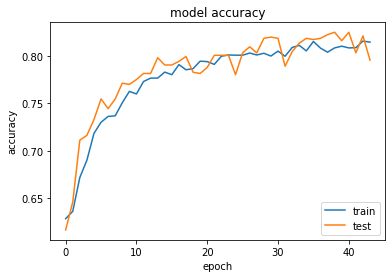

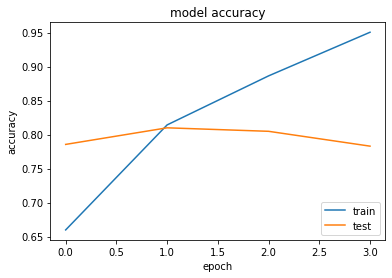

In [ ]:
target_names=['Claim','Premise']
 
y_pred_SG=[]
y_true_SG=[]

X_sg,X_Debater=X[:len(labels_list)], X[len(labels_list):]
X_sg_before,X_Debater_before=X_before[:len(labels_list)], X_before[len(labels_list):]
X_sg_after,X_Debater_after=X_after[:len(labels_list)], X_after[len(labels_list):]

X_train, X_test = X_sg[sections_train_set], X_sg[sections_test_set]
X_before_train, X_before_test = X_sg_before[sections_train_set], X_sg_before[sections_test_set]
X_after_train, X_after_test = X_sg_after[sections_train_set], X_sg_after[sections_test_set]
X_stat_train, X_stat_test = X_argument_sections_stat[sections_train_set], X_argument_sections_stat[sections_test_set]
Y_train, Y_test = Y[sections_train_set], Y[sections_test_set]

# Train the model.
model,model_stat=train_MultiModal(X_train, X_before_train,X_after_train,X_stat_train,Y_train)

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model.predict([X_test, X_before_test, X_after_test, X_stat_test]).tolist()
for input in y_pred_temp:
  y_pred_SG.append(round(input[0]))
y_true_SG+=Y_test.tolist()

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true_SG, y_pred_SG, target_names=target_names))   

              precision    recall  f1-score   support

       Claim       0.72      0.68      0.70       330
     Premise       0.82      0.84      0.83       570

    accuracy                           0.78       900
   macro avg       0.77      0.76      0.76       900
weighted avg       0.78      0.78      0.78       900



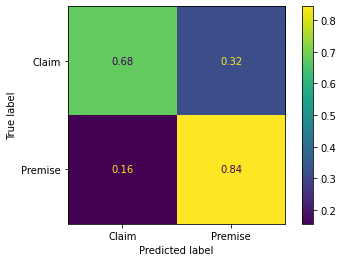

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true_SG, y_pred_SG,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

## **Stat model results**

In [ ]:
y_pred=[]
y_true=[]

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model_stat.predict(X_stat_test).tolist()
for input in y_pred_temp:
  y_pred.append(round(input[0]))
y_true+=Y_test.tolist()

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

       Claim       0.96      0.15      0.25       330
     Premise       0.67      1.00      0.80       570

    accuracy                           0.68       900
   macro avg       0.81      0.57      0.53       900
weighted avg       0.78      0.68      0.60       900



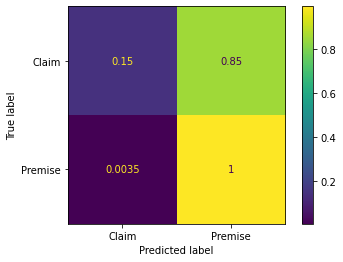

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true, y_pred,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

# **Debater Predictions**

In [ ]:
X_Debater_train, X_Debater_test = X_Debater[Debater_sections_train_set], X_Debater[Debater_sections_test_set]
X_Debater_before_train, X_Debater_before_test = X_Debater_before[Debater_sections_train_set], X_Debater_before[Debater_sections_test_set]
X_Debater_after_train, X_Debater_after_test = X_Debater_after[Debater_sections_train_set], X_Debater_after[Debater_sections_test_set]
X_Debater_stat_train, X_Debater_stat_test = X_Debater_argument_sections_stat[Debater_sections_train_set], X_Debater_argument_sections_stat[Debater_sections_test_set]
Y_Debater_test=Y_Debater[Debater_sections_test_set]

In [ ]:
y_pred_Debater=[]
y_true_Debater=[]

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model.predict([X_Debater_test, X_Debater_before_test, X_Debater_after_test,X_Debater_stat_test]).tolist()
for input in y_pred_temp:
    y_pred_Debater.append(round(input[0]))
y_true_Debater+=Y_Debater_test.tolist()

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true_Debater, y_pred_Debater, target_names=target_names))   

              precision    recall  f1-score   support

       Claim       0.86      0.35      0.50       222
     Premise       0.66      0.96      0.78       292

    accuracy                           0.69       514
   macro avg       0.76      0.65      0.64       514
weighted avg       0.74      0.69      0.66       514



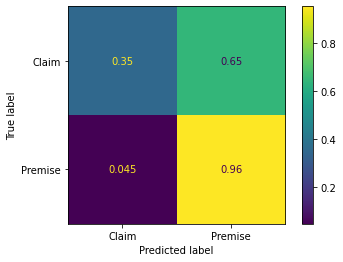

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true_Debater, y_pred_Debater,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

## **Stat model results**

In [ ]:
y_pred=[]
y_true=[]

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model_stat.predict(X_Debater_stat_test).tolist()
for input in y_pred_temp:
  y_pred.append(round(input[0]))
y_true+=Y_Debater_test.tolist()

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

       Claim       0.45      0.42      0.43       222
     Premise       0.58      0.61      0.59       292

    accuracy                           0.53       514
   macro avg       0.51      0.51      0.51       514
weighted avg       0.52      0.53      0.52       514



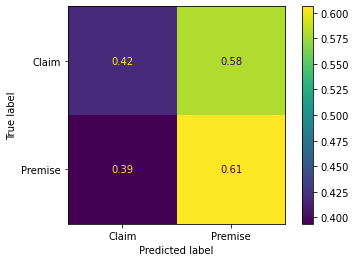

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true, y_pred,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

# **Sentences predictions**

In [ ]:
# Gets in input the list of ture labels and predicted labels of the test set and returns
# two list.
# One of the list contain only if the prediction are write(1) or wrong(0).
# The other list contain also the indication of the tipe of mistake (true/false positive/negative).

def get_correct_predictions(y_true_list:list,y_pred_list:list):
  result_list=[]
  result_list_int=[]

  for i in range(0,len(y_true_list)):
    correct_prediction=""
    correct_prediction_int=1
    if y_pred_list[i]==0:
      if y_true_list[i]==0:
        correct_prediction="True claim"
      else:
        correct_prediction="False claim"
        correct_prediction_int=0
    else:
      if y_true_list[i]==1:
        correct_prediction="True premise"
      else:
        correct_prediction="False premise"
        correct_prediction_int=0
    result_list.append(correct_prediction)
    result_list_int.append(correct_prediction_int)    

  return result_list, result_list_int



In [ ]:
# Create a list containing the correspondent value of true positive, ture negative,
# false positive and false negative, for the predicitons of the NN on the
# test sets of the two datset. 

# The correlation to select the feature to pass to the STC will be evaluated only 
# on the report of the presence of an error in each sentences (not considering the type
# of the error), sentence_prediction_int list.

sentence_prediction_SG, sentence_prediction_SG_int=get_correct_predictions(y_true_SG, y_pred_SG)
sentence_prediction_Debater, sentence_prediction_Debater_int=get_correct_predictions(y_true_Debater, y_pred_Debater)

# Get the list of the sentences used in the test sets and their length.
test_set_sentences_list_SG=[sentence_list[argument_to_sentence_map[i]] for i in sections_test_set]
test_set_sentences_list_Debater=[Debater_sentence_list[Debater_argument_to_sentence_map[i]] for i in Debater_sections_test_set]
test_set_sentences_length_SG=[arg_section_len_list[i] for i in sections_test_set]
test_set_sentences_length_Debater=[Debater_arg_section_len_list[i] for i in Debater_sections_test_set]

argument_test_set_sentences_list_SG=[arg_sections_list[i] for i in sections_test_set]
argument_test_set_sentences_list_Debater=[Debater_arg_sections_list[i] for i in Debater_sections_test_set]

# For the section in more than one sentence concatenate the sentences together.
for i in range(0,len(test_set_sentences_list_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    test_set_sentences_list_SG[i]+=" . "+sentence_list[argument_to_sentence_map[sections_test_set[i]+j+1]]

for i in range(0,len(test_set_sentences_list_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    test_set_sentences_list_Debater[i]+=" . "+Debater_sentence_list[Debater_argument_to_sentence_map[Debater_sections_test_set[i]+j+1]]    

In [ ]:
len(test_set_sentences_list_SG)

900

In [ ]:
len(sentence_prediction_SG)

900

In [ ]:
sentence_prediction_SG.count("False premise")

106

In [ ]:
sentence_prediction_SG.count("True premise")

481

In [ ]:
sentence_prediction_SG.count("False claim")

89

In [ ]:
sentence_prediction_SG.count("True claim")

224

In [ ]:
len(sentence_prediction_Debater)

514

In [ ]:
sentence_prediction_Debater.count("False premise")

144

In [ ]:
sentence_prediction_Debater.count("True premise")

279

In [ ]:
sentence_prediction_Debater.count("False claim")

13

In [ ]:
sentence_prediction_Debater.count("True claim")

78

## **Correaltion scores**

In [ ]:
# Compute the sorted correlation scores.
# Takes in input a dataframe and a list of labels, returns the sorted (from higher to lower) 
# list of columns names and their correlation value.

def get_correlation_scores(dataframe: pd.DataFrame, labels: list)->list:
  correlation_scores= []

  columns=dataframe.columns
  for column in columns:
    correlation, p_value = spearmanr(dataframe[column].values, labels)
    # Correlation absolute value.
    correlation = np.abs(correlation)
    correlation_scores.append((correlation,column))

  # Sort the correlation scores of each word with the lable by the correlation score associated.
  correlation_scores=sorted(correlation_scores, key=lambda x: (x[0]), reverse=True)    

  return correlation_scores

## **POS preparation**

In [ ]:
# Separate each sentence in the list of POS TAG that compones them.
POS_sentence_list=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in test_set_sentences_list_SG]
Debater_POS_sentence_list=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in test_set_sentences_list_Debater]

POS_sentence_list[0]

[('from', 'IN'),
 ('this', 'DT'),
 ('point', 'NN'),
 ('of', 'IN'),
 ('view', 'NN'),
 (',', ','),
 ('i', 'NN'),
 ('firmly', 'RB'),
 ('believe', 'VBP'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('should', 'MD'),
 ('attach', 'VB'),
 ('more', 'JJR'),
 ('importance', 'NN'),
 ('to', 'TO'),
 ('cooperation', 'NN'),
 ('during', 'IN'),
 ('primary', 'JJ'),
 ('education', 'NN')]

In [ ]:
# Create a version with the simplifyed version of the POS tag.

simplified_POS_sentence_list=[]
Debater_simplified_POS_sentence_list=[]

for POS_sentence in POS_sentence_list:
  simplified_POS_sentence_list.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence])
for POS_sentence in Debater_POS_sentence_list:
  Debater_simplified_POS_sentence_list.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence])  

In [ ]:
simplified_POS_sentence_list[0]

[('from', 'ADP'),
 ('this', 'DET'),
 ('point', 'NOUN'),
 ('of', 'ADP'),
 ('view', 'NOUN'),
 (',', '.'),
 ('i', 'NOUN'),
 ('firmly', 'ADV'),
 ('believe', 'VERB'),
 ('that', 'ADP'),
 ('we', 'PRON'),
 ('should', 'VERB'),
 ('attach', 'VERB'),
 ('more', 'ADJ'),
 ('importance', 'NOUN'),
 ('to', 'PRT'),
 ('cooperation', 'NOUN'),
 ('during', 'ADP'),
 ('primary', 'ADJ'),
 ('education', 'NOUN')]

In [ ]:
# Get the list of the sentences as POS tag from the list of the
# list of the POS tag of each sentence. 
def get_POS_sentence_list(POS_sentence_list: list)->list:
  POS_sentences=[]
  for POS_list in POS_sentence_list:
    sentence=""
    for word, tag in POS_list:
      sentence+=tag+" "
    POS_sentences.append(sentence)    

  return POS_sentences

In [ ]:
POS_sentences=get_POS_sentence_list(POS_sentence_list)
Debater_POS_sentences=get_POS_sentence_list(Debater_POS_sentence_list)
simple_POS_sentences=get_POS_sentence_list(simplified_POS_sentence_list)
Debater_simple_POS_sentences=get_POS_sentence_list(Debater_simplified_POS_sentence_list)

POS_sentences[0]

'IN DT NN IN NN , NN RB VBP IN PRP MD VB JJR NN TO NN IN JJ NN '

## **Customised Tokenizer**

In [ ]:
#  Lemmatization is used.
def build_tokenizer(text):

  wordnet_lemmatizer = WordNetLemmatizer()

  # Text tokenization.
  tokens=nltk.word_tokenize(text)

  # Text normalization throgh lemmatizzation.

  lemmas=[]
  for word in tokens:
    lemmas.append(wordnet_lemmatizer.lemmatize(word))

  return lemmas  

## **Bag of words**

In [ ]:
# Trasformation of the passed corpus in the dataframe of the bag of ngram contained
# in it.
def bag_of_ngram(sentence_list: list, ngram: int)-> pd.DataFrame:
  vectorizer=CountVectorizer(tokenizer=build_tokenizer,ngram_range=(ngram,ngram))
  bag_ngram=vectorizer.fit_transform(sentence_list)

  dataframe=pd.DataFrame(bag_ngram.toarray(), columns=vectorizer.get_feature_names())

  return dataframe

## **POS Bigrams**

In [ ]:
# Get the BOW of the bigrams of the POS tag.

POS_bigrams=bag_of_ngram(POS_sentences,2)
simple_POS_bigrams=bag_of_ngram(simple_POS_sentences,2)
Debater_POS_bigrams=bag_of_ngram(Debater_POS_sentences,2)
Debater_simple_POS_bigrams=bag_of_ngram(Debater_simple_POS_sentences,2)

POS_bigrams.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,$ cc,$ jj,$ jjs,$ nn,$ nns,$ rb,$ vbn,"'' ,",'' dt,'' nn,'' vbz,", ``",", cc",", cd",", dt",", ex",", fw",", in",", jj",", jjr",", jjs",", md",", nn",", nnp",", nns",", pdt",", prp",", rb",", rbr",", to",", vb",", vbd",", vbg",", vbn",", vbp",", vbz",", wdt",", wp",", wrb",". ,",...,vbz wp,vbz wrb,"wdt ,",wdt dt,wdt jj,wdt md,wdt nn,wdt nns,wdt prp,wdt rb,wdt vbd,wdt vbp,wdt vbz,wdt wrb,wp dt,wp in,wp jj,wp md,wp nn,wp prp,wp rb,wp to,wp vbd,wp vbp,wp vbz,wrb cc,wrb cd,wrb dt,wrb ex,wrb jj,wrb jjr,wrb jjs,wrb md,wrb nn,wrb nns,wrb prp,wrb rb,wrb to,wrb vbg,wrb vbz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**correlation score**

In [ ]:
# Compute the correlation scores considering only the train test sentences.
train_correlation_scores_POS_bigram=get_correlation_scores(POS_bigrams,sentence_prediction_SG_int)
train_correlation_scores_simple_POS_bigram=get_correlation_scores(simple_POS_bigrams,sentence_prediction_SG_int)

Debater_train_correlation_scores_POS_bigram=get_correlation_scores(Debater_POS_bigrams,sentence_prediction_Debater_int)
Debater_train_correlation_scores_simple_POS_bigram=get_correlation_scores(Debater_simple_POS_bigrams,sentence_prediction_Debater_int)

In [ ]:
train_correlation_scores_POS_bigram=[correlation_score for correlation_score in train_correlation_scores_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_POS_bigram[0:10]

[(0.10803921721546958, 'nns po'),
 (0.10583295532916993, 'jjr cc'),
 (0.09425622954245144, 'nn ,'),
 (0.0932569994881855, 'rb ,'),
 (0.0923003727857413, 'nn md'),
 (0.08973339149246946, 'in cc'),
 (0.08973339149246946, 'po vbg'),
 (0.08649786021807335, ', jjr'),
 (0.082674271716354, 'rb cc'),
 (0.08128912846623829, 'prp vbd')]

In [ ]:
most_correlated_bigram_POS=[bigram[1] for bigram in train_correlation_scores_POS_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_POS_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_POS_bigram[0:10]

[(0.283269266024087, 'nn .'),
 (0.2631092421048878, 'in cd'),
 (0.22810462596887096, 'nn nn'),
 (0.22498182416024626, 'cd ,'),
 (0.22496578666518388, 'cd nn'),
 (0.21269202380527646, '. in'),
 (0.2025693755841301, 'nn vbd'),
 (0.19908665964275404, 'jj nn'),
 (0.19774424007499156, 'jj cd'),
 (0.1922057871082976, 'nn ,')]

In [ ]:
Debater_most_correlated_bigram_POS=[bigram[1] for bigram in Debater_train_correlation_scores_POS_bigram[0:100]]

In [ ]:
most_correlated_bigram_POS[0:3]

['nns po', 'jjr cc', 'nn ,']

In [ ]:
train_correlation_scores_simple_POS_bigram=[correlation_score for correlation_score in train_correlation_scores_simple_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_simple_POS_bigram[0:10]

[(0.12483736903312873, 'noun .'),
 (0.08973339149246946, 'adp conj'),
 (0.08653904369609859, 'adv .'),
 (0.07195616187091557, 'conj adp'),
 (0.06455548635445495, 'adp noun'),
 (0.06442433469725872, 'det noun'),
 (0.06422909817337824, 'adv conj'),
 (0.06366967212612551, 'verb num'),
 (0.06356998287357982, 'adj adp'),
 (0.06312587877415517, 'pron noun')]

In [ ]:
most_correlated_bigram_simple_POS=[bigram[1] for bigram in train_correlation_scores_simple_POS_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_simple_POS_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_simple_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_simple_POS_bigram[0:10]

[(0.2698556960583517, 'noun noun'),
 (0.2631092421048878, 'adp num'),
 (0.2505600171830653, 'noun .'),
 (0.24301645903730373, 'verb adp'),
 (0.23885160557271692, '. adj'),
 (0.23864189418471365, 'noun verb'),
 (0.2337989803869373, 'num noun'),
 (0.22456404177278805, 'adj noun'),
 (0.21769587327922224, 'num .'),
 (0.21752341878876424, 'adj num')]

In [ ]:
Debater_most_correlated_bigram_simple_POS=[bigram[1] for bigram in Debater_train_correlation_scores_simple_POS_bigram[0:100]]

## **Bag of words and Bigrams correlation**

In [ ]:
bag_words_dataframe=bag_of_ngram(test_set_sentences_list_SG, 1)
bag_bigrams_dataframe=bag_of_ngram(test_set_sentences_list_SG, 2)

Debater_bag_words_dataframe=bag_of_ngram(test_set_sentences_list_Debater, 1)
Debater_bag_bigrams_dataframe=bag_of_ngram(test_set_sentences_list_Debater, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bag_words_dataframe.head()

,!,%,','','innovate,'m,'s,'teachers,'this,'ve,'your,",",-,.,1,10,15,1969,1st,2,2030,370,40,4:00,99,:,;,``,a,ability,able,about,above,above-mentioned,abroad,absence,absolutely,absorb,absorbed,abstract,...,wing,wise,wish,with,within,without,witnessed,woman,wonderful,word,wore,work,worked,worker,working,workplace,world,worldwide,worrying,worse,worsens,worth,worthwhile,would,writer,writing,written,wrong,year,yet,yield,you,young,youngster,your,zappa,zoo,–,’,“
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Debater_bag_words_dataframe.head()

,$,%,&,','','cradle,'is,'juvenile,'only,'public,'re,'reconsidering,'s,'something,(,),",",.,..,0.28,0.47,1,1.54,1/8,10,10.1,100,"100,000",104,10–15,11,11.2,11.8,"115,000",12,"12,000",120.,122,1225–1274,127,...,working,workshop,world,worldwide,worry,worsened,worth,worthwhile,would,wound,wounding,wrapped,wrecked,writes,writing,writings..,written,wrong,wrote,wta,wwe,x,yates,year,yet,yielded,you,young,younger,youth,zentrales,zone,|,£1.9,"£13,456.07",£660.74,‘,’,“,”
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bag_bigrams_dataframe.head()

,"% ,",' accomplishment,' attention,' basic,' confidence,' economic,' effectiveness,' health,' kind,' knowledge,' learning,' life,' mental,' mistake,' personality,' profit,' progress,' school,' spelling,' the,"'' ,",'' is,'innovate ','m in,'m totally,'s a,'s achievement,'s an,'s birthday,'s characteristic,'s choice,'s daily,'s dependence,'s eating,'s electricity,'s environmental,'s fun,'s future,'s good,'s gravity,...,you perfect,you right,you see,you the,you think,you visit,you want,young age,young generation,young one,young owner,young people,your classmate,your clothes,your doubt,your future,your group,your job,your major,your performance,your skill,your student,zappa once,"zoo ,",zoo afford,zoo are,zoo for,zoo have,zoo is,zoo kept,zoo not,zoo offer,zoo provide,zoo they,zoo will,zoo would,zoo you,– the,’ s,’ t
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Debater_bag_bigrams_dataframe.head()

,$ 2,$ 21,$ 400,$ 7,$ 830,"% ,",% ;,% and,% divorced,% estimated,% for,% in,% increase,% market,% of,% reported,% said,% to,% wa,% will,& nbsp,& processing,& sullivan,& world,' '',"' ,",' .,' ability,' consent,' country,' culture,' development,' food,' grad,' imprisonment,' increased,' leader,' section,' wind,'' (,...,year 2040,year after,year and,year in,year is,year of,year on,year round,year to,year will,yet discussing,yet during,yet until,yielded £660.74,you .,you believe,you do,you think,young a,young voter,young woman,younger ;,youth experience,zentrales dopingkontrolllabor,zone and,zone targeted,zone than,| hamas,| the,£1.9 billion,"£13,456.07 million",£660.74 million,‘ socialist,’ market,’ s,’ t,’ than,“ civil,“ teenage,” lee
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select the 50 words/bigram most correlated to the output (correlation computed considering 
# only the train test).

train_correlation_scores_words=get_correlation_scores(bag_words_dataframe,sentence_prediction_SG_int)
train_correlation_scores_bigram=get_correlation_scores(bag_bigrams_dataframe,sentence_prediction_SG_int)

Debater_train_correlation_scores_words=get_correlation_scores(Debater_bag_words_dataframe,sentence_prediction_Debater_int)
Debater_train_correlation_scores_bigram=get_correlation_scores(Debater_bag_bigrams_dataframe,sentence_prediction_Debater_int)

In [ ]:
train_correlation_scores_words=[correlation_score for correlation_score in train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_words[0:10]

[(0.12704373219529522, 'enough'),
 (0.12436047994673118, 'fund'),
 (0.1226275311511033, 'plan'),
 (0.11716726645695287, 'secondly'),
 (0.11342978767400243, 'financial'),
 (0.10996175399848558, 'atmosphere'),
 (0.10996175399848558, 'saving'),
 (0.1069426475329482, 'prepared'),
 (0.10583295532916993, 'ease'),
 (0.10346579022576945, 'student')]

In [ ]:
most_correlated_word=[word[1] for word in train_correlation_scores_words[0:100]]

In [ ]:
Debater_train_correlation_scores_words=[correlation_score for correlation_score in Debater_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_words[0:10]

[(0.3227225361427385, '.'),
 (0.27913367244116033, 'in'),
 (0.24937597812176918, ','),
 (0.18422817160377244, 'the'),
 (0.17884981151535392, 'were'),
 (0.17360179194119998, 'sex'),
 (0.17269493439039527, 'on'),
 (0.16702109211276658, '``'),
 (0.15770941645707942, 'by'),
 (0.15760184268341282, 'at')]

In [ ]:
Debater_most_correlated_word=[word[1] for word in Debater_train_correlation_scores_words[0:100]]

In [ ]:
train_correlation_scores_bigram=[correlation_score for correlation_score in train_correlation_scores_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_bigram[0:10]

[(0.11716726645695287, 'secondly ,'),
 (0.10996175399848558, 'more and'),
 (0.10996175399848558, 'most people'),
 (0.10996175399848558, 'obvious that'),
 (0.10996175399848558, 'the atmosphere'),
 (0.10996161778945589, 'centre for'),
 (0.10770490137193227, 'that the'),
 (0.10701047306634096, 'to prepare'),
 (0.10583295532916993, 'find a'),
 (0.10007071205137438, 'therefore ,')]

In [ ]:
most_correlated_bigram=[bigram[1] for bigram in train_correlation_scores_bigram[0:100]]

In [ ]:
Debater_train_correlation_scores_bigram=[correlation_score for correlation_score in Debater_train_correlation_scores_bigram if not math.isnan(correlation_score[0])]

In [ ]:
Debater_train_correlation_scores_bigram[0:10]

[(0.13947051795027077, 'in a'),
 (0.13898800601222022, 'in the'),
 (0.1368679951954348, 'the first'),
 (0.1368494804843652, '. in'),
 (0.13385855942839853, 'at the'),
 (0.13354547878703568, 'human life'),
 (0.1291342921040809, 'the united'),
 (0.1255111163180871, 'according to'),
 (0.12417179125915598, 'with no'),
 (0.12135900447687827, 'of god')]

In [ ]:
Debater_most_correlated_bigram=[bigram[1] for bigram in Debater_train_correlation_scores_bigram[0:100]]

## **Only argumentative sections: Bag of words correlation**

In [ ]:
a_bag_words_dataframe=bag_of_ngram(argument_test_set_sentences_list_SG, 1)

a_Debater_bag_words_dataframe=bag_of_ngram(argument_test_set_sentences_list_Debater, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
a_bag_words_dataframe.head()

,%,','','innovate,'m,'s,'teachers,'this,'ve,'your,",",-,.,1,10,15,1969,1st,2,2030,370,40,4:00,99,:,;,``,a,ability,able,about,above,abroad,absence,absolutely,absorb,absorbed,abstract,academic,accelarates,...,win,window,wing,wise,wish,with,within,without,witnessed,woman,wonderful,word,wore,work,worked,worker,working,workplace,world,worldwide,worrying,worsens,worth,worthwhile,would,writer,writing,written,wrong,year,yield,you,young,youngster,your,zappa,zoo,–,’,“
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
a_Debater_bag_words_dataframe.head()

,$,%,&,','','is,'m,'re,'reconsidering,'s,'something,'the,(,),",",.,..,..and,.16,.3,0.040,0.078,0.161,0.2,0.28,0.47,0.83,1,"1,000",1.54,1/8,10,"10,000",10.1,10.7,100,"100,000",1000,102,104,...,worldwide,worn,worry,worsened,worst,worth,worthlessness,worthwhile,would,wound,wounded,wounding,wrapped,wrecked,writes,writing,writings..,wrong,wrote,x,yates,year,yearold,yet,yielded,you,young,younger,youth,yunnan,zone,£1.9,"£13,456.07",£660.74,–,—,‘,’,“,”
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select the 50 words/bigram most correlated to the output (correlation computed considering 
# only the train test).

a_train_correlation_scores_words=get_correlation_scores(a_bag_words_dataframe,sentence_prediction_SG_int)

a_Debater_train_correlation_scores_words=get_correlation_scores(a_Debater_bag_words_dataframe,sentence_prediction_Debater_int)

In [ ]:
a_train_correlation_scores_words=[correlation_score for correlation_score in a_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
a_train_correlation_scores_words[0:10]

[(0.12907852423266022, ','),
 (0.1226275311511033, 'plan'),
 (0.12260041478639991, 'fund'),
 (0.10996175399848558, 'atmosphere'),
 (0.10996175399848558, 'enough'),
 (0.10996175399848558, 'saving'),
 (0.10583295532916993, 'prepared'),
 (0.10346327368936932, 'past'),
 (0.0939613144987958, 'financial'),
 (0.09254026802723532, 'for')]

In [ ]:
a_most_correlated_word=[word[1] for word in a_train_correlation_scores_words[0:100]]

In [ ]:
a_Debater_train_correlation_scores_words=[correlation_score for correlation_score in a_Debater_train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
a_Debater_train_correlation_scores_words[0:10]

[(0.39879303536506117, ','),
 (0.3226938592278662, '.'),
 (0.31563685769613575, 'in'),
 (0.2810825856016154, 'the'),
 (0.2640553160442485, 'that'),
 (0.24631697716677728, 'and'),
 (0.21467679228122621, 'of'),
 (0.1831303161272738, '``'),
 (0.18182523075993834, 'biodiversity'),
 (0.16804829560939097, "''")]

In [ ]:
a_Debater_most_correlated_word=[word[1] for word in a_Debater_train_correlation_scores_words[0:100]]

# **STC SG**

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

statistic=pd.read_csv('sentence_statistic.csv')
statistic=statistic.iloc[sections_test_set]
statistic.reset_index(drop=True, inplace=True)

POS=pd.read_csv('sentence_POS.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    print("POS")
    print(POS.iloc[i])
    POS.iloc[i]+=POS.iloc[i+j+1]
    print(POS.iloc[i+j+1])
    print(POS.iloc[i])
POS=POS.iloc[sections_test_set]
POS.reset_index(drop=True, inplace=True)

simple_POS=pd.read_csv('sentence_simple_POS.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    simple_POS.iloc[i]+=simple_POS.iloc[i+j+1]
simple_POS=simple_POS.iloc[sections_test_set]
simple_POS.reset_index(drop=True, inplace=True)

bigram_POS=POS_bigrams[most_correlated_bigram_POS]
bigram_POS.reset_index(drop=True, inplace=True)

bigram_simple_POS=simple_POS_bigrams[most_correlated_bigram_simple_POS]
bigram_simple_POS.reset_index(drop=True, inplace=True)

dependency=pd.read_csv('sentence_dependency.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    dependency.iloc[i]+=dependency.iloc[i+j+1]
dependency=dependency.iloc[sections_test_set]
dependency.reset_index(drop=True, inplace=True)

dependency_tree_stat=pd.read_csv('sentence_dependency_tree_stat.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    print("dependency")
    print(dependency_tree_stat.iloc[i])
    print(dependency_tree_stat.iloc[i+j+1])
    dependency_tree_stat.iloc[i]['tree depth']=max(dependency_tree_stat.iloc[i]['tree depth'],dependency_tree_stat.iloc[i+j+1]['tree depth'])
    dependency_tree_stat.iloc[i]['max number of children of a ROOT node']=max(dependency_tree_stat.iloc[i]['max number of children of a ROOT node'],dependency_tree_stat.iloc[i+j+1]['max number of children of a ROOT node'])
    print(print(dependency_tree_stat.iloc[i]))
dependency_tree_stat=dependency_tree_stat.iloc[sections_test_set]
dependency_tree_stat.reset_index(drop=True, inplace=True)

named_entity=pd.read_csv('sentence_named_entity_BOW.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    named_entity.iloc[i]+=named_entity.iloc[i+j+1]
named_entity=named_entity.iloc[sections_test_set]
named_entity.reset_index(drop=True, inplace=True)

BOW=bag_words_dataframe[most_correlated_word]
BOW.reset_index(drop=True, inplace=True)

Bigram=bag_bigrams_dataframe[most_correlated_bigram]
Bigram.reset_index(drop=True, inplace=True)

imported_ngram=pd.read_csv('essay_BOW_appendix_words.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    imported_ngram.iloc[i]+=imported_ngram.iloc[i+j+1]
imported_ngram=imported_ngram.iloc[sections_test_set]
imported_ngram.reset_index(drop=True, inplace=True)

others=pd.read_csv('remaining_stat.csv')
for i in range(0,len(test_set_sentences_length_SG)):
  for j in range(0,test_set_sentences_length_SG[i]):
    others.iloc[i]+=others.iloc[i+j+1]
  others.iloc[i]=others.iloc[i]/(test_set_sentences_length_SG[i]+1)
others=others.iloc[sections_test_set]
others.reset_index(drop=True, inplace=True)

a_BOW=a_bag_words_dataframe[a_most_correlated_word]
a_BOW.reset_index(drop=True, inplace=True)

POS
$      0
''     1
(      0
)      0
,      2
.      0
:      1
``     1
cc     0
cd     0
dt     2
ex     0
fw     0
in     4
jj     3
jjr    0
jjs    0
md     0
nn     9
nnp    0
nns    0
pdt    0
po     0
prp    0
rb     1
rbr    0
rp     0
sym    0
to     0
uh     0
vb     0
vbd    0
vbg    0
vbn    0
vbp    0
vbz    3
wdt    1
wp     0
wrb    0
Name: 162, dtype: int64
$      0
''     0
(      0
)      0
,      0
.      0
:      0
``     0
cc     1
cd     0
dt     2
ex     1
fw     0
in     2
jj     2
jjr    0
jjs    0
md     0
nn     3
nnp    0
nns    2
pdt    0
po     1
prp    0
rb     0
rbr    0
rp     0
sym    0
to     0
uh     0
vb     0
vbd    0
vbg    1
vbn    0
vbp    0
vbz    1
wdt    0
wp     0
wrb    0
Name: 163, dtype: int64
$       0
''      1
(       0
)       0
,       2
.       0
:       1
``      1
cc      1
cd      0
dt      4
ex      1
fw      0
in      6
jj      5
jjr     0
jjs     0
md      0
nn     12
nnp     0
nns     2
pdt     0
po      1
prp     0
rb    

In [ ]:
statistic.shape

(900, 7)

In [ ]:
bigram_POS.shape

(900, 100)

In [ ]:
# Remove data types that are not categorical.
statistic=statistic.drop(columns=['number words in sentence','sentence length / media sentence length in essay'])
others=others.drop(columns=['type token ratio'])
statistic=statistic.round(0)
others=others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
dataframe_non_used=dependency
dataframe_non_used=pd.concat([dataframe_non_used,POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,dependency_tree_stat], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,named_entity], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,imported_ngram], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,others], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,Bigram], axis=1)
print(dataframe_non_used.shape)

dataframe_used=statistic
dataframe_used=pd.concat([dataframe_used,BOW], axis=1)
print(dataframe_used.shape)

(900, 83)
(900, 95)
(900, 97)
(900, 114)
(900, 154)
(900, 155)
(900, 255)
(900, 355)
(900, 455)
(900, 105)


In [ ]:
dataframe_used.shape

(900, 105)

In [ ]:
sentence_predictions_SG = pd.DataFrame(data={'argumentative': sentence_prediction_SG})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_premise=-1
pos_claim=-1
count=0
instance_premise=""
istance_claim=""
section_instance_premise=""
section_istance_claim=""

for i in test_index:
  if sentence_prediction_SG[i]=='False premise':
    instance_premise=test_set_sentences_list_SG[i]
    section_instance_premise=argument_test_set_sentences_list_SG[i]
    pos_premise=count
  if sentence_prediction_SG[i]=='False claim':
    instance_claim=test_set_sentences_list_SG[i]
    section_instance_claim=argument_test_set_sentences_list_SG[i]
    pos_claim=count
  if not (pos_claim==-1 or pos_premise==-1):
    break
  count+=1  

print(instance_claim)
print(instance_premise)
print(section_instance_claim)
print(section_instance_premise)
print(pos_claim)
print(pos_premise)

besides , girls are more likely to prefer some jobs related to emotion and communication , such as teacher , singer and interpreter 
thus , it is clear that cctvs must be put in all workplace so that crime rates can be minimized 
girls are more likely to prefer some jobs related to emotion and communication , such as teacher , singer and interpreter 
cctvs must be put in all workplace so that crime rates can be minimized 
2
1


In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_non_used,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.2833333333333333
f1 score: 0.24917801803188017
precision: 0.2579707486487147
recall: 0.2767938296376327


In [ ]:
global_explainability_tabular.loc["True claim"][:25]

,features,score
argumentative,,
True claim,jj vbp: 1,0.000052
True claim,nn rb: 1,0.000045
True claim,vbz rbr: 1,0.000040
True claim,adp noun: 2,0.000039
True claim,conj: 3,0.000039
True claim,case: 1,0.000038
True claim,nn: 10,0.000036
True claim,wdt md: 1,0.000035
True claim,adj adp: 3,0.000035


In [ ]:
global_explainability_tabular.loc["True premise"][:25]

,features,score
argumentative,,
True premise,prp vbd: 1,0.000102
True premise,vbd rb: 1,0.000057
True premise,"nn ,: 3",0.000057
True premise,nns vbd: 1,0.000052
True premise,cc vbd: 1,0.000051
True premise,cc: 3,0.000051
True premise,conj: 3,0.000050
True premise,vbd dt: 1,0.000043
True premise,noun noun: 2,0.000041


In [ ]:
global_explainability_tabular.loc["False claim"][:25]

,features,score
argumentative,,
False claim,pron prt: 1,0.000077
False claim,environmental pollution: 1,0.000066
False claim,a responsibility: 1,0.000066
False claim,"foremost ,: 1",0.000066
False claim,could find: 1,0.000066
False claim,student to: 1,0.000064
False claim,in conclusion: 1,0.000055
False claim,max number of children of a ROOT node: 8,0.000054
False claim,$: 3,0.000052


In [ ]:
global_explainability_tabular.loc["False premise"][:25]

,features,score
argumentative,,
False premise,noun noun: 2,0.000082
False premise,jj rb: 1,0.000059
False premise,adj adv: 1,0.000056
False premise,on balance: 1,0.000056
False premise,to consent: 1,0.000056
False premise,technology in: 1,0.000056
False premise,expedites data: 1,0.000056
False premise,it expedites: 1,0.000056
False premise,availability and: 1,0.000056


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:15]

features         score
item argumentative                           
1    False premise    nn nns: 1  6.036072e-08
     False premise      conj: 0  3.641323e-08
     False premise      rb ,: 1  3.422238e-08
     False premise        cc: 0  3.338806e-08
     False premise   prp vbz: 1  3.298653e-08
     False premise     adv .: 1  3.169368e-08
     False premise  adp noun: 2  3.096401e-08
     False premise     in nn: 2  2.782331e-08
     False premise  prt verb: 0  2.689833e-08
     False premise     nn md: 1  2.582715e-08
     False premise    noun .: 0  2.448599e-08
     False premise   adj adp: 1  2.156063e-08
     False premise    be put: 1  2.044665e-08
     False premise  verb adp: 1  1.948931e-08
     False premise       vbp: 1  1.850879e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:15]

features         score
item argumentative                             
2    False claim      prt verb: 1  5.753727e-08
     False claim          conj: 0  4.245795e-08
     False claim            cc: 0  3.805574e-08
     False claim       adj prt: 1  2.873509e-08
     False claim    tree depth: 4  2.408342e-08
     False claim           neg: 1  2.139112e-08
     False claim      moreover: 1  1.836237e-08
     False claim          pobj: 1  1.625237e-08
     False claim         dt nn: 0  1.543057e-08
     False claim     noun noun: 0  1.526464e-08
     False claim       adj adp: 1  1.525334e-08
     False claim      verb adp: 0  1.507113e-08
     False claim          prep: 1  1.457275e-08
     False claim      adp noun: 1  1.367340e-08
     False claim       nns vbp: 1  1.363703e-08

## **Used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_used,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.39444444444444443
f1 score: 0.3670307703291211
precision: 0.391281179138322
recall: 0.4025798448548873


In [ ]:
global_explainability_tabular.loc["True claim"][:25]

,features,score
argumentative,,
True claim,view: 1,0.000498
True claim,sentence in essay: 10,0.000303
True claim,although: 1,0.000218
True claim,we: 1,0.000199
True claim,total sentences in paragraph: 7,0.000179
True claim,sentence in essay: 13,0.000167
True claim,much: 1,0.000155
True claim,work: 1,0.000140
True claim,competition: 1,0.000129


In [ ]:
global_explainability_tabular.loc["True premise"][:25]

,features,score
argumentative,,
True premise,instance: 1,0.000319
True premise,example: 1,0.000305
True premise,",: 4",0.000295
True premise,much: 1,0.000198
True premise,we: 1,0.000153
True premise,while: 1,0.000151
True premise,work: 1,0.000146
True premise,sentence in essay: 13,0.000124
True premise,get: 1,0.000115


In [ ]:
global_explainability_tabular.loc["False claim"][:25]

,features,score
argumentative,,
False claim,plan: 1,0.000378
False claim,saving: 1,0.000284
False claim,growing: 1,0.000284
False claim,first: 1,0.000277
False claim,enough: 1,0.000159
False claim,example: 1,0.000156
False claim,accompany: 1,0.000142
False claim,attempt: 1,0.000142
False claim,ass: 1,0.000142


In [ ]:
global_explainability_tabular.loc["False premise"][:25]

,features,score
argumentative,,
False premise,agriculture: 1,0.000486
False premise,mind: 1,0.000427
False premise,availability: 1,0.000241
False premise,data: 1,0.000241
False premise,expedites: 1,0.000241
False premise,consent: 1,0.000241
False premise,accelarates: 1,0.000241
False premise,convincing: 1,0.000241
False premise,newly: 1,0.000241


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:15]

features         score
item argumentative                                               
1    False premise                            it: 1  5.782886e-07
     False premise                             ,: 1  2.672425e-07
     False premise                            in: 1  2.639829e-07
     False premise  total paragraphs in document: 4  2.454154e-07
     False premise                          thus: 1  1.969712e-07
     False premise            paragraph in essay: 1  1.667834e-07
     False premise         sentence in paragraph: 1  1.331553e-07
     False premise                         first: 0  7.936006e-08
     False premise                       example: 0  4.008714e-08
     False premise                         which: 0  3.938178e-08
     False premise                       student: 0  3.771738e-08
     False premise             sentence in essay: 5  3.137238e-08
     False premise                   agriculture: 0  3.136449e-08
     False premise                            we: 0  3.105205e-08
     False premise                          food: 0  2.604063e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:15]

features         score
item argumentative                                               
2    False claim    total paragraphs in document: 4  3.720477e-07
     False claim                         besides: 1  3.620929e-07
     False claim                              in: 0  2.447578e-07
     False claim              paragraph in essay: 1  1.868223e-07
     False claim           sentence in paragraph: 1  1.570040e-07
     False claim                               ,: 3  1.077705e-07
     False claim                              it: 0  1.024466e-07
     False claim               sentence in essay: 3  9.397553e-08
     False claim                           first: 0  7.048416e-08
     False claim    total sentences in paragraph: 5  5.912315e-08
     False claim                           which: 0  4.198254e-08
     False claim                         example: 0  3.878312e-08
     False claim                         student: 0  3.684884e-08
     False claim                     agriculture: 0  3.394239e-08
     False claim                              we: 0  2.957253e-08

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(statistic,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.19444444444444445
f1 score: 0.18850571265928445
precision: 0.251984126984127
recall: 0.2208988584200808


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,sentence in essay: 10,0.006363
True claim,total sentences in paragraph: 7,0.003767
True claim,sentence in essay: 13,0.003504
True claim,sentence in essay: 0,0.001112
True claim,sentence in essay: 22,0.001096
True claim,total paragraphs in document: 7,0.000968
True claim,paragraph in essay: 2,0.000879
True claim,sentence in paragraph: 3,0.000851
True claim,sentence in essay: 1,0.000820


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,sentence in essay: 13,0.002596
True premise,sentence in essay: 10,0.002357
True premise,total sentences in paragraph: 7,0.002047
True premise,sentence in essay: 0,0.001163
True premise,sentence in paragraph: 7,0.001106
True premise,sentence in essay: 21,0.001106
True premise,sentence in essay: 18,0.001068
True premise,sentence in paragraph: 3,0.000895
True premise,sentence in essay: 22,0.000788


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,sentence in essay: 20,0.002267
False claim,sentence in essay: 0,0.001403
False claim,sentence in essay: 14,0.001334
False claim,sentence in essay: 1,0.001138
False claim,sentence in essay: 11,0.000966
False claim,sentence in essay: 23,0.000908
False claim,sentence in essay: 13,0.000884
False claim,sentence in paragraph: 4,0.000855
False claim,total paragraphs in document: 4,0.000820


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,sentence in essay: 10,0.003405
False premise,sentence in essay: 27,0.002532
False premise,sentence in essay: 28,0.002532
False premise,total sentences in paragraph: 7,0.002365
False premise,sentence in paragraph: 8,0.001419
False premise,sentence in essay: 19,0.001330
False premise,sentence in paragraph: 3,0.001079
False premise,paragraph in essay: 2,0.000764
False premise,sentence in paragraph: 2,0.000720


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                           
1    False premise  total paragraphs in document: 4  0.000108
     False premise            paragraph in essay: 1  0.000074
     False premise         sentence in paragraph: 1  0.000059
     False premise             sentence in essay: 5  0.000014
     False premise  total sentences in paragraph: 6  0.000006

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                                           
2    False claim    total paragraphs in document: 4  0.000164
     False claim              paragraph in essay: 1  0.000082
     False claim           sentence in paragraph: 1  0.000069
     False claim               sentence in essay: 3  0.000041
     False claim    total sentences in paragraph: 5  0.000026

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(POS,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.2222222222222222
f1 score: 0.21952502439421043
precision: 0.22806911226028875
recall: 0.2576272058445233


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,po: 1,0.000424
True claim,nn: 10,0.000416
True claim,vbg: 3,0.000336
True claim,$: 2,0.000332
True claim,wp: 2,0.000294
True claim,cc: 3,0.000282
True claim,'': 1,0.000276
True claim,vb: 3,0.000272
True claim,pdt: 1,0.000247


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,cc: 3,0.000406
True premise,vb: 3,0.000377
True premise,po: 1,0.000319
True premise,in: 7,0.000232
True premise,$: 2,0.000217
True premise,jj: 7,0.000198
True premise,nn: 4,0.000168
True premise,vbd: 3,0.000166
True premise,",: 3",0.000154


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,$: 3,0.000612
False claim,pdt: 1,0.000513
False claim,po: 1,0.000504
False claim,rb: 6,0.000383
False claim,(: 1,0.000383
False claim,): 1,0.000383
False claim,vbd: 4,0.000383
False claim,in: 9,0.000267
False claim,vbn: 4,0.000267


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,vb: 3,0.000428
False premise,po: 2,0.000417
False premise,cd: 2,0.000222
False premise,nns: 8,0.000218
False premise,nn: 11,0.000184
False premise,ex: 2,0.000184
False premise,cc: 4,0.000182
False premise,jjr: 2,0.000173
False premise,jjs: 1,0.000167


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
1    False premise   vbp: 1  0.000003
     False premise    md: 0  0.000001
     False premise     ,: 1  0.000001
     False premise   vbg: 0  0.000001
     False premise   nns: 3  0.000001

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
2    False claim      md: 1  0.000002
     False claim     nns: 1  0.000001
     False claim      cc: 0  0.000001
     False claim       ,: 1  0.000001
     False claim      in: 0  0.000001

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(simple_POS,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.17777777777777778
f1 score: 0.177674590722135
precision: 0.21233031674208147
recall: 0.23286701194171483


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,noun: 0,0.000940
True claim,conj: 3,0.000917
True claim,verb: 5,0.000622
True claim,adj: 2,0.000578
True claim,noun: 4,0.000516
True claim,verb: 9,0.000489
True claim,noun: 10,0.000473
True claim,verb: 10,0.000471
True claim,.: 2,0.000465


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,conj: 3,0.001319
True premise,adp: 7,0.000754
True premise,adj: 2,0.000654
True premise,adj: 7,0.000644
True premise,.: 3,0.000571
True premise,noun: 4,0.000524
True premise,adj: 4,0.000493
True premise,verb: 5,0.000438
True premise,noun: 13,0.000433


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,pron: 6,0.001244
False claim,adj: 2,0.000994
False claim,adv: 6,0.000869
False claim,adp: 9,0.000869
False claim,noun: 4,0.000716
False claim,verb: 5,0.000660
False claim,prt: 5,0.000634
False claim,noun: 10,0.000526
False claim,.: 2,0.000346


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,num: 2,0.000723
False premise,adj: 4,0.000605
False premise,conj: 4,0.000591
False premise,noun: 0,0.000553
False premise,noun: 2,0.000545
False premise,noun: 13,0.000531
False premise,noun: 11,0.000500
False premise,adp: 0,0.000485
False premise,.: 3,0.000467


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
1    False premise   adj: 1  0.000019
     False premise  verb: 3  0.000018
     False premise  conj: 0  0.000012
     False premise     .: 1  0.000012
     False premise   det: 2  0.000009

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
2    False claim     adj: 1  0.000014
     False claim    conj: 0  0.000014
     False claim     adp: 0  0.000012
     False claim       .: 1  0.000011
     False claim    pron: 0  0.000006

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_POS,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.34444444444444444
f1 score: 0.31040694055399937
precision: 0.32629566306428004
recall: 0.34674132382112005


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,jj vbp: 1,0.000239
True claim,nn rb: 1,0.000205
True claim,vbz rbr: 1,0.000183
True claim,wdt md: 1,0.000161
True claim,jj in: 3,0.000161
True claim,nns wdt: 1,0.000153
True claim,nn nns: 1,0.000135
True claim,"vb ,: 1",0.000108
True claim,nns vbp: 2,0.000103


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,prp vbd: 1,0.000464
True premise,vbd rb: 1,0.000260
True premise,"nn ,: 3",0.000258
True premise,nns vbd: 1,0.000238
True premise,cc vbd: 1,0.000232
True premise,vbd dt: 1,0.000194
True premise,", wrb: 1",0.000182
True premise,vbd to: 1,0.000172
True premise,prp in: 1,0.000169


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,jjr nns: 1,0.000199
False claim,", jjr: 1",0.000167
False claim,in jjs: 1,0.000159
False claim,po vbg: 1,0.000149
False claim,in rbr: 1,0.000149
False claim,jj vbp: 2,0.000149
False claim,rp in: 1,0.000136
False claim,"rb ,: 1",0.000123
False claim,nn rb: 1,0.000107


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,jj rb: 1,0.000270
False premise,"vbn ,: 1",0.000195
False premise,vbn nn: 1,0.000153
False premise,nn nns: 2,0.000143
False premise,jjr cc: 1,0.000133
False premise,in nn: 3,0.000128
False premise,rb nns: 2,0.000127
False premise,to nn: 2,0.000127
False premise,vbp wp: 1,0.000127


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                          
1    False premise   nn nns: 1  1.249618e-06
     False premise     rb ,: 1  7.084889e-07
     False premise  prp vbz: 1  6.829037e-07
     False premise    in nn: 2  5.760121e-07
     False premise    nn md: 1  5.346866e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                          
2    False claim      dt nn: 0  3.194514e-07
     False claim    nns vbp: 1  2.823206e-07
     False claim       rb ,: 0  2.360667e-07
     False claim      to nn: 1  1.977088e-07
     False claim      in nn: 1  1.717855e-07

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_simple_POS,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.25555555555555554
f1 score: 0.24274431678538924
precision: 0.2814135087997463
recall: 0.28006936941571914


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,adp noun: 2,0.000177
True claim,adj adp: 3,0.000161
True claim,noun adv: 2,0.000147
True claim,prt verb: 3,0.000108
True claim,noun prt: 3,0.000108
True claim,adj verb: 1,0.000103
True claim,adj prt: 1,0.000094
True claim,noun noun: 2,0.000091
True claim,pron prt: 1,0.000091


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,noun noun: 2,0.000185
True premise,verb adp: 3,0.000182
True premise,pron adp: 1,0.000181
True premise,pron noun: 3,0.000180
True premise,adp pron: 3,0.000156
True premise,verb pron: 2,0.000151
True premise,det noun: 4,0.000137
True premise,verb num: 1,0.000127
True premise,pron prt: 1,0.000122


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,pron prt: 1,0.000352
False claim,adp adj: 2,0.000155
False claim,adj verb: 2,0.000149
False claim,prt adp: 1,0.000136
False claim,prt verb: 1,0.000119
False claim,adv .: 1,0.000114
False claim,adp noun: 0,0.000100
False claim,. conj: 1,0.000094
False claim,noun pron: 2,0.000088


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,noun noun: 2,0.000374
False premise,adj adv: 1,0.000255
False premise,adp pron: 3,0.000127
False premise,adp verb: 3,0.000127
False premise,adp conj: 1,0.000127
False premise,pron adj: 2,0.000085
False premise,. noun: 3,0.000085
False premise,. x: 1,0.000085
False premise,adp num: 1,0.000082


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                           
1    False premise     adv .: 1  6.561384e-07
     False premise  adp noun: 2  6.410325e-07
     False premise  prt verb: 0  5.568626e-07
     False premise    noun .: 0  5.069212e-07
     False premise   adj adp: 1  4.463589e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                            
2    False claim     prt verb: 1  1.191165e-06
     False claim      adj prt: 1  5.948882e-07
     False claim    noun noun: 0  3.160163e-07
     False claim      adj adp: 1  3.157823e-07
     False claim     verb adp: 0  3.120100e-07

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.18888888888888888
f1 score: 0.17040442014126225
precision: 0.20365918803418803
recall: 0.18650854898732658


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,case: 1,0.000389
True claim,po: 2,0.000316
True claim,oprd: 1,0.000220
True claim,conj: 3,0.000199
True claim,dobj: 4,0.000194
True claim,nsubjpass: 2,0.000184
True claim,relcl: 1,0.000161
True claim,prep: 6,0.000161
True claim,xcomp: 2,0.000146


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,case: 1,0.000306
True premise,pobj: 7,0.000293
True premise,po: 2,0.000253
True premise,cc: 3,0.000245
True premise,conj: 3,0.000239
True premise,prep: 6,0.000217
True premise,nsubjpass: 2,0.000205
True premise,amod: 7,0.000176
True premise,amod: 4,0.000146


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,case: 1,0.000539
False claim,po: 2,0.000366
False claim,dobj: 4,0.000359
False claim,csubjpass: 1,0.000339
False claim,pobj: 9,0.000339
False claim,agent: 2,0.000339
False claim,xcomp: 2,0.000242
False claim,dep: 1,0.000237
False claim,npadvmod: 2,0.000237


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,intj: 1,0.000400
False premise,case: 2,0.000370
False premise,amod: 5,0.000304
False premise,xcomp: 3,0.000288
False premise,relcl: 3,0.000288
False premise,po: 3,0.000250
False premise,prep: 8,0.000193
False premise,expl: 2,0.000193
False premise,nummod: 2,0.000193


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                          
1    False premise     prep: 3  1.864355e-06
     False premise       po: 0  1.242768e-06
     False premise     conj: 0  1.085128e-06
     False premise       cc: 0  9.089456e-07
     False premise  auxpass: 1  7.545724e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
2    False claim     neg: 1  0.000002
     False claim    pobj: 1  0.000002
     False claim    prep: 1  0.000002
     False claim    conj: 0  0.000001
     False claim      po: 0  0.000001

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency_tree_stat,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.23333333333333334
f1 score: 0.22779214425496225
precision: 0.2519107290803645
recall: 0.26000668827493956


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,max number of children of a ROOT node: 8,0.005124
True claim,tree depth: 11,0.004041
True claim,tree depth: 8,0.003698
True claim,max number of children of a ROOT node: 9,0.003517
True claim,tree depth: 12,0.002688
True claim,tree depth: 10,0.002096
True claim,tree depth: 4,0.001571
True claim,max number of children of a ROOT node: 10,0.001467
True claim,tree depth: 1,0.001467


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,max number of children of a ROOT node: 8,0.005264
True premise,tree depth: 11,0.004521
True premise,max number of children of a ROOT node: 9,0.004215
True premise,tree depth: 10,0.003517
True premise,tree depth: 8,0.003409
True premise,tree depth: 4,0.002421
True premise,tree depth: 13,0.001289
True premise,tree depth: 15,0.001289
True premise,tree depth: 6,0.001092


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,max number of children of a ROOT node: 8,0.012194
False claim,tree depth: 10,0.011637
False claim,tree depth: 16,0.007463
False claim,tree depth: 4,0.002493
False claim,max number of children of a ROOT node: 1,0.002427
False claim,tree depth: 5,0.001087
False claim,tree depth: 6,0.001054
False claim,tree depth: 8,0.000790
False claim,tree depth: 2,0.000753


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,max number of children of a ROOT node: 12,0.006329
False premise,max number of children of a ROOT node: 13,0.006329
False premise,tree depth: 8,0.005358
False premise,max number of children of a ROOT node: 9,0.002760
False premise,tree depth: 6,0.001698
False premise,tree depth: 4,0.001454
False premise,max number of children of a ROOT node: 1,0.001029
False premise,max number of children of a ROOT node: 2,0.000985
False premise,tree depth: 2,0.000958


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                                    
1    False premise                             tree depth: 4  0.000727
     False premise  max number of children of a ROOT node: 7  0.000074

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                                                    
2    False claim                               tree depth: 4  0.001246
     False claim    max number of children of a ROOT node: 6  0.000349

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(named_entity,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.13333333333333333
f1 score: 0.09594247364606262
precision: 0.17966082659478888
recall: 0.2523780533118394


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,gpe: 1,0.000324
True claim,norp: 1,0.000316
True claim,person: 2,0.000316
True claim,org: 2,0.000316
True claim,quantity: 1,0.000316
True claim,time: 2,0.000316
True claim,time: 1,0.000302
True claim,org: 1,0.000141
True claim,cardinal: 1,0.000122


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,person: 1,0.001061
True premise,gpe: 1,0.000465
True premise,norp: 1,0.000303
True premise,date: 2,0.000303
True premise,loc: 1,0.000303
True premise,org: 1,0.000237
True premise,money: 1,0.000152
True premise,percent: 1,0.000152
True premise,gpe: 2,0.000152


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,norp: 3,8.779631e-04
False claim,language: 1,2.398566e-04
False claim,time: 1,2.097493e-04
False claim,org: 1,1.957953e-04
False claim,date: 1,8.633630e-05
False claim,cardinal: 1,6.798118e-05
False claim,ordinal: 1,6.701249e-05
False claim,cardinal: 0,1.293920e-05
False claim,date: 0,4.684563e-06


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,cardinal: 2,1.158285e-03
False premise,fac: 1,7.446016e-04
False premise,cardinal: 1,2.306197e-04
False premise,ordinal: 1,5.683338e-05
False premise,date: 1,4.881462e-05
False premise,cardinal: 0,1.213763e-05
False premise,date: 0,4.779996e-06
False premise,ordinal: 0,3.198176e-06
False premise,time: 0,2.029910e-06


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                           
1    False premise  cardinal: 0  7.139784e-07
     False premise      date: 0  2.811762e-07
     False premise   ordinal: 0  1.881280e-07
     False premise      time: 0  1.194065e-07
     False premise       gpe: 0  7.408037e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                           
2    False claim    cardinal: 0  7.611293e-07
     False claim        date: 0  2.755625e-07
     False claim     ordinal: 0  1.858513e-07
     False claim        time: 0  1.176243e-07
     False claim         gpe: 0  7.408037e-08

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(BOW,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.38333333333333336
f1 score: 0.3643142012494422
precision: 0.39375
recall: 0.414813814431811


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,view: 1,0.000522
True claim,although: 1,0.000229
True claim,we: 1,0.000209
True claim,much: 1,0.000163
True claim,work: 1,0.000147
True claim,competition: 1,0.000135
True claim,reason: 1,0.000134
True claim,first: 1,0.000128
True claim,while: 1,0.000110


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,instance: 1,0.000335
True premise,example: 1,0.000320
True premise,",: 4",0.000309
True premise,much: 1,0.000208
True premise,we: 1,0.000160
True premise,while: 1,0.000158
True premise,work: 1,0.000153
True premise,get: 1,0.000121
True premise,competition: 1,0.000116


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,plan: 1,0.000397
False claim,saving: 1,0.000299
False claim,growing: 1,0.000299
False claim,first: 1,0.000291
False claim,enough: 1,0.000167
False claim,example: 1,0.000163
False claim,accompany: 1,0.000149
False claim,attempt: 1,0.000149
False claim,ass: 1,0.000149


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,agriculture: 1,0.000510
False premise,mind: 1,0.000448
False premise,availability: 1,0.000253
False premise,data: 1,0.000253
False premise,expedites: 1,0.000253
False premise,consent: 1,0.000253
False premise,accelarates: 1,0.000253
False premise,convincing: 1,0.000253
False premise,newly: 1,0.000253


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                        
1    False premise     it: 1  6.375632e-07
     False premise      ,: 1  2.946349e-07
     False premise     in: 1  2.910411e-07
     False premise   thus: 1  2.171607e-07
     False premise  first: 0  8.749447e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                          
2    False claim    besides: 1  3.992074e-07
     False claim         in: 0  2.698455e-07
     False claim          ,: 3  1.188169e-07
     False claim         it: 0  1.129473e-07
     False claim      first: 0  7.770879e-08

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Bigram,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.55
f1 score: 0.2945
precision: 0.32182753552180304
recall: 0.327115238405561


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,student to: 1,6.940712e-05
True claim,"therefore ,: 1",5.566726e-05
True claim,that the: 1,5.254401e-05
True claim,student ': 1,3.347001e-05
True claim,"secondly ,: 1",2.747932e-05
True claim,prepared food: 1,2.721102e-05
True claim,find a: 1,2.372701e-05
True claim,to prepare: 1,1.917585e-05
True claim,that the: 0,3.878399e-06


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,that the: 1,2.159025e-05
True premise,for my: 1,2.061421e-05
True premise,the use: 1,1.665324e-05
True premise,"balance ,: 1",1.002199e-05
True premise,"secondly ,: 1",8.782052e-06
True premise,be put: 1,8.618670e-06
True premise,"therefore ,: 1",5.337170e-06
True premise,student ': 1,4.011225e-06
True premise,that the: 0,3.967748e-06


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,environmental pollution: 1,0.000299
False claim,a responsibility: 1,0.000299
False claim,"foremost ,: 1",0.000299
False claim,could find: 1,0.000299
False claim,student to: 1,0.000289
False claim,for my: 1,0.000239
False claim,find a: 1,0.000198
False claim,most people: 1,0.000167
False claim,saving money: 1,0.000149


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,on balance: 1,0.000253
False premise,to consent: 1,0.000253
False premise,accelarates student: 1,0.000253
False premise,and accelarates: 1,0.000253
False premise,in education: 1,0.000253
False premise,technology in: 1,0.000253
False premise,data availability: 1,0.000253
False premise,expedites data: 1,0.000253
False premise,it expedites: 1,0.000253


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                              
1    False premise       be put: 1  4.232967e-07
     False premise     that the: 0  3.621960e-08
     False premise  therefore ,: 0  1.683592e-08
     False premise       for my: 0  1.349887e-08
     False premise   student to: 0  1.259186e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                              
2    False claim       that the: 0  3.849618e-08
     False claim    therefore ,: 0  1.743696e-08
     False claim         for my: 0  1.289444e-08
     False claim     student to: 0  1.202805e-08
     False claim         find a: 0  1.079710e-08

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(imported_ngram,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4
f1 score: 0.23787150580307953
precision: 0.2657773279352227
recall: 0.24885599057925034


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,in conclusion: 1,0.000181
True claim,for instance: 1,0.000166
True claim,in addition: 1,0.000151
True claim,thus: 1,0.000121
True claim,hence: 1,0.000113
True claim,clearly: 1,0.000073
True claim,for: 3,0.000069
True claim,furthermore: 1,0.000066
True claim,for: 2,0.000048


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,in addition: 1,0.000363
True premise,in conclusion: 1,0.000195
True premise,besides: 1,0.000195
True premise,moreover: 1,0.000181
True premise,consequently: 1,0.000101
True premise,for: 3,0.000099
True premise,thus: 1,0.000087
True premise,for instance: 1,0.000080
True premise,conclude that: 1,0.000064


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,in conclusion: 1,0.000627
False claim,to sum up: 1,0.000125
False claim,moreover: 1,0.000095
False claim,for instance: 1,0.000092
False claim,due to: 1,0.000076
False claim,for: 1,0.000061
False claim,so: 1,0.000049
False claim,furthermore: 1,0.000037
False claim,since: 1,0.000029


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,hence: 1,0.000177
False premise,consequently: 1,0.000165
False premise,besides: 1,0.000159
False premise,to sum up: 1,0.000106
False premise,moreover: 1,0.000081
False premise,thus: 1,0.000071
False premise,due to: 1,0.000065
False premise,furthermore: 1,0.000063
False premise,for: 1,0.000062


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                                
1    False premise            for: 1  1.543357e-06
     False premise    for example: 1  1.887912e-07
     False premise  in conclusion: 0  1.815530e-07
     False premise        because: 0  4.538197e-08
     False premise             so: 0  3.772224e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                                
2    False claim         moreover: 1  2.375919e-06
     False claim              for: 0  3.018053e-07
     False claim    in conclusion: 0  1.680042e-07
     False claim          because: 0  4.682133e-08
     False claim               so: 0  3.639147e-08

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(others,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3333333333333333
f1 score: 0.17826825127334464
precision: 0.16314423433444566
recall: 0.2270011947431302


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,subjectivity score: 1.0,0.000519
True claim,subjectivity score: 0.0,0.000451


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,subjectivity score: 1.0,0.000543
True premise,subjectivity score: 0.0,0.000433


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,subjectivity score: 1.0,0.000540
False claim,subjectivity score: 0.0,0.000435


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,subjectivity score: 0.0,0.000488
False premise,subjectivity score: 1.0,0.000472


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features    subjectivity score: 1.0
score                   0.000472064
Name: (1, False premise), dtype: object

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features    subjectivity score: 0.0
score                   0.000434651
Name: (2, False claim), dtype: object

## **BOW argumentative sections**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(a_BOW,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.43333333333333335
f1 score: 0.3568850267379679
precision: 0.38640073382411744
recall: 0.4201308500968942


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,no: 1,0.000138
True claim,much: 1,0.000136
True claim,work: 1,0.000135
True claim,we: 1,0.000128
True claim,reason: 1,0.000114
True claim,responsibility: 1,0.000110
True claim,competition: 1,0.000108
True claim,and: 2,0.000098
True claim,management: 1,0.000060


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,",: 3",0.000335
True premise,while: 1,0.000194
True premise,",: 4",0.000180
True premise,much: 1,0.000169
True premise,work: 1,0.000156
True premise,we: 1,0.000147
True premise,and: 2,0.000116
True premise,field: 1,0.000111
True premise,competition: 1,0.000103


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,plan: 1,0.000397
False claim,saving: 1,0.000299
False claim,growing: 1,0.000299
False claim,fund: 1,0.000159
False claim,responsibility: 1,0.000152
False claim,accompany: 1,0.000149
False claim,attempt: 1,0.000149
False claim,ass: 1,0.000149
False claim,aided: 1,0.000149


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,mind: 1,0.000448
False premise,agriculture: 1,0.000407
False premise,centre: 2,0.000253
False premise,third: 1,0.000253
False premise,exposed: 1,0.000253
False premise,past: 1,0.000233
False premise,invention: 1,0.000224
False premise,reason: 1,0.000201
False premise,management: 1,0.000142


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                          
1    False premise        ,: 0  5.656104e-07
     False premise       in: 1  3.715533e-07
     False premise      and: 0  1.062900e-07
     False premise      for: 0  8.847480e-08
     False premise  student: 0  2.812091e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                          
2    False claim          ,: 2  2.802301e-07
     False claim        and: 2  2.481295e-07
     False claim         in: 0  1.421807e-07
     False claim        for: 0  8.610625e-08
     False claim    student: 0  2.755341e-08

# **STC Debater**

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

Debater_statistic=pd.read_csv('Debater_sentence_statistic.csv')
Debater_statistic=Debater_statistic.iloc[Debater_sections_test_set]
Debater_statistic.reset_index(drop=True, inplace=True)

Debater_POS=pd.read_csv('Debater_sentence_POS.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_POS.iloc[i]+=Debater_POS.iloc[i+j+1]
Debater_POS=Debater_POS.iloc[Debater_sections_test_set]
Debater_POS.reset_index(drop=True, inplace=True)

Debater_simple_POS=pd.read_csv('Debater_sentence_simple_POS.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_simple_POS.iloc[i]+=Debater_simple_POS.iloc[i+j+1]
Debater_simple_POS=Debater_simple_POS.iloc[Debater_sections_test_set]
Debater_simple_POS.reset_index(drop=True, inplace=True)

Debater_bigram_POS=Debater_POS_bigrams[Debater_most_correlated_bigram_POS]
Debater_bigram_POS.reset_index(drop=True, inplace=True)

Debater_bigram_simple_POS=Debater_simple_POS_bigrams[Debater_most_correlated_bigram_simple_POS]
Debater_bigram_simple_POS.reset_index(drop=True, inplace=True)

Debater_dependency=pd.read_csv('Debater_sentence_dependency.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_dependency.iloc[i]+=Debater_dependency.iloc[i+j+1]
Debater_dependency=Debater_dependency.iloc[Debater_sections_test_set]
Debater_dependency.reset_index(drop=True, inplace=True)

Debater_dependency_tree_stat=pd.read_csv('Debater_sentence_dependency_tree_stat.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_dependency_tree_stat.iloc[i]['tree depth']=max(Debater_dependency_tree_stat.iloc[i]['tree depth'],Debater_dependency_tree_stat.iloc[i+j+1]['tree depth'])
    Debater_dependency_tree_stat.iloc[i]['max number of children of a ROOT node']=max(Debater_dependency_tree_stat.iloc[i]['max number of children of a ROOT node'],Debater_dependency_tree_stat.iloc[i+j+1]['max number of children of a ROOT node'])
Debater_dependency_tree_stat=Debater_dependency_tree_stat.iloc[Debater_sections_test_set]
Debater_dependency_tree_stat.reset_index(drop=True, inplace=True)

Debater_named_entity=pd.read_csv('Debater_sentence_named_entity_BOW.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_named_entity.iloc[i]+=Debater_named_entity.iloc[i+j+1]
Debater_named_entity=Debater_named_entity.iloc[Debater_sections_test_set]
Debater_named_entity.reset_index(drop=True, inplace=True)

Debater_BOW=Debater_bag_words_dataframe[Debater_most_correlated_word]
Debater_BOW.reset_index(drop=True, inplace=True)

Debater_Bigram=Debater_bag_bigrams_dataframe[Debater_most_correlated_bigram]
Debater_Bigram.reset_index(drop=True, inplace=True)

Debater_imported_ngram=pd.read_csv('Debater_BOW_appendix_words.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_imported_ngram.iloc[i]+=Debater_imported_ngram.iloc[i+j+1]
Debater_imported_ngram=Debater_imported_ngram.iloc[Debater_sections_test_set]
Debater_imported_ngram.reset_index(drop=True, inplace=True)

Debater_others=pd.read_csv('Debater_remaining_stat.csv')
for i in range(0,len(test_set_sentences_length_Debater)):
  for j in range(0,test_set_sentences_length_Debater[i]):
    Debater_others.iloc[i]+=Debater_others.iloc[i+j+1]
  Debater_others.iloc[i]=Debater_others.iloc[i]/(test_set_sentences_length_Debater[i]+1)  
Debater_others=Debater_others.iloc[Debater_sections_test_set]
Debater_others.reset_index(drop=True, inplace=True)

a_Debater_BOW=a_Debater_bag_words_dataframe[a_Debater_most_correlated_word]
a_Debater_BOW.reset_index(drop=True, inplace=True)

In [ ]:
Debater_statistic.shape

(514, 7)

In [ ]:
Debater_bigram_POS.shape

(514, 100)

In [ ]:
# Remove data types that are not categorical.
Debater_statistic=Debater_statistic.drop(columns=['number words in sentence','sentence length / media sentence length in essay'])
Debater_others=Debater_others.drop(columns=['type token ratio'])
Debater_statistic=Debater_statistic.round(0)
Debater_others=Debater_others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
Debater_dataframe_non_used=Debater_dependency
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_simple_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_dependency_tree_stat], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_named_entity], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_imported_ngram], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_others], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_bigram_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_bigram_simple_POS], axis=1)
print(Debater_dataframe_non_used.shape)
Debater_dataframe_non_used=pd.concat([Debater_dataframe_non_used,Debater_Bigram], axis=1)
print(Debater_dataframe_non_used.shape)

Debater_dataframe_used=Debater_statistic
Debater_dataframe_used=pd.concat([Debater_dataframe_used,Debater_BOW], axis=1)
print(Debater_dataframe_used.shape)

(514, 83)
(514, 95)
(514, 97)
(514, 114)
(514, 154)
(514, 155)
(514, 255)
(514, 355)
(514, 455)
(514, 105)


In [ ]:
dataframe_used.shape

(900, 106)

In [ ]:
sentence_predictions_Debater = pd.DataFrame(data={'argumentative': sentence_prediction_Debater})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(Debater_others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_premise=-1
pos_claim=-1
count=0
instance_premise=""
istance_claim=""
section_instance_premise=""
section_istance_claim=""

for i in test_index:
  if sentence_prediction_Debater[i]=='False premise':
    instance_premise=test_set_sentences_list_Debater[i]
    section_instance_premise=argument_test_set_sentences_list_Debater[i]
    pos_premise=count
  if sentence_prediction_Debater[i]=='False claim':
    instance_claim=test_set_sentences_list_Debater[i]
    section_instance_claim=argument_test_set_sentences_list_Debater[i]
    pos_claim=count
  if not (pos_claim==-1 or pos_premise==-1):
    break
  count+=1  

print(instance_claim)
print(instance_premise)
print(section_instance_claim)
print(section_instance_premise)
print(pos_claim)
print(pos_premise)

according to the freedom forum organization , legal systems , and society at large , recognize limits on the freedom of speech , particularly when freedom of speech conflicts with other values or rights 
this occurrence may dilute the vote of a particular party and lead to a nominee who does not represent the views of his particular party 
according to the freedom forum organization , legal systems , and society at large , recognize limits on the freedom of speech , particularly when freedom of speech conflicts with other values or rights 
may dilute the vote of a particular party and lead to a nominee who does not represent the views of his particular party 
6
5


In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dataframe_non_used,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6407766990291263
f1 score: 0.39394399683000925
precision: 0.4141865079365079
recall: 0.3985714285714286


In [ ]:
global_explainability_tabular.loc["True claim"][:25]

,features,score
argumentative,,
True claim,noun prt: 0,0.000274
True claim,nn in: 0,0.000192
True claim,jj nns: 1,0.000176
True claim,det noun: 2,0.000155
True claim,noun .: 0,0.000154
True claim,subjectivity score: 0.0,0.000152
True claim,in nn: 5,0.000151
True claim,vbp: 1,0.000150
True claim,noun verb: 2,0.000140


In [ ]:
global_explainability_tabular.loc["True premise"][:25]

,features,score
argumentative,,
True premise,. in: 1,0.000307
True premise,nn .: 1,0.000290
True premise,num adj: 1,0.000269
True premise,noun prt: 0,0.000254
True premise,", cd: 1",0.000250
True premise,cd jj: 1,0.000250
True premise,. num: 1,0.000245
True premise,adj num: 1,0.000244
True premise,noun num: 1,0.000230


In [ ]:
global_explainability_tabular.loc["False claim"][:25]

,features,score
argumentative,,
False claim,det: 19,0.000488
False claim,jj nn: 4,0.000414
False claim,verb .: 2,0.000370
False claim,in nn: 6,0.000358
False claim,verb adp: 4,0.000348
False claim,adp noun: 7,0.000320
False claim,. det: 3,0.000310
False claim,cc: 5,0.000294
False claim,. dt: 1,0.000270


In [ ]:
global_explainability_tabular.loc["False premise"][:25]

,features,score
argumentative,,
False premise,noun prt: 0,0.000309
False premise,noun noun: 0,0.000212
False premise,noun .: 0,0.000196
False premise,in dt: 1,0.000185
False premise,adp det: 1,0.000177
False premise,jj nns: 1,0.000177
False premise,adj: 2,0.000156
False premise,nns: 2,0.000155
False premise,subjectivity score: 0.0,0.000140


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:15]

features         score
item argumentative                             
5    False premise   noun noun: 0  4.653696e-07
     False premise      noun .: 0  4.308287e-07
     False premise       in dt: 1  4.071004e-07
     False premise     adp det: 1  3.889172e-07
     False premise         adj: 2  3.420799e-07
     False premise          jj: 2  3.067991e-07
     False premise   noun verb: 1  2.432505e-07
     False premise       jj nn: 2  2.155590e-07
     False premise         vbn: 0  1.640827e-07
     False premise     auxpass: 0  1.556869e-07
     False premise      . noun: 0  1.517570e-07
     False premise    num noun: 0  1.456046e-07
     False premise      nn vbd: 0  1.419378e-07
     False premise  tree depth: 5  1.360323e-07
     False premise       . adp: 0  1.321076e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:15]

features         score
item argumentative                               
6    False claim            nn ,: 2  3.241138e-07
     False claim    according to: 1  2.140973e-07
     False claim          vbg to: 1  2.112662e-07
     False claim        adv noun: 1  2.088160e-07
     False claim               ,: 1  1.811575e-07
     False claim         prt det: 1  1.737336e-07
     False claim            , vb: 1  1.568651e-07
     False claim         auxpass: 1  1.325114e-07
     False claim            root: 3  1.123300e-07
     False claim          . verb: 1  9.471118e-08
     False claim          nn vbd: 0  7.237999e-08
     False claim               .: 3  7.072777e-08
     False claim        num noun: 0  6.717844e-08
     False claim        noun adp: 5  6.494923e-08
     False claim          . noun: 0  6.059164e-08

## **Used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dataframe_used,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6213592233009708
f1 score: 0.49786967418546363
precision: 0.5514093137254902
recall: 0.5357142857142856


In [ ]:
global_explainability_tabular.loc["True claim"][:25]

,features,score
argumentative,,
True claim,of: 0,0.000773
True claim,",: 0",0.000587
True claim,a: 1,0.000558
True claim,case: 1,0.000466
True claim,paragraph in essay: 13,0.000394
True claim,.: 0,0.000390
True claim,total sentences in paragraph: 15,0.000358
True claim,of: 4,0.000351
True claim,paragraph in essay: 20,0.000321


In [ ]:
global_explainability_tabular.loc["True premise"][:25]

,features,score
argumentative,,
True premise,.: 1,0.001147
True premise,were: 1,0.000797
True premise,in: 2,0.000709
True premise,%: 1,0.000707
True premise,.: 3,0.000707
True premise,at: 1,0.000685
True premise,total paragraphs in document: 43,0.000679
True premise,a: 1,0.000633
True premise,but: 1,0.000567


In [ ]:
global_explainability_tabular.loc["False claim"][:25]

,features,score
argumentative,,
False claim,.: 1,0.002288
False claim,11: 1,0.001058
False claim,sentence in essay: 282,0.001058
False claim,harm: 2,0.001058
False claim,sentence in essay: 292,0.001058
False claim,the: 10,0.001058
False claim,united: 1,0.001013
False claim,sentence in essay: 152,0.000935
False claim,transmission: 1,0.000935


In [ ]:
global_explainability_tabular.loc["False premise"][:25]

,features,score
argumentative,,
False premise,of: 0,0.000756
False premise,",: 0",0.000690
False premise,a: 1,0.000601
False premise,total paragraphs in document: 16,0.000408
False premise,.: 0,0.000396
False premise,paragraph in essay: 9,0.000380
False premise,resource: 1,0.000349
False premise,dioxide: 1,0.000349
False premise,total sentences in paragraph: 2,0.000347


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:15]

features         score
item argumentative                                                
5    False premise                              ,: 0  6.569807e-06
     False premise                              .: 0  3.771179e-06
     False premise   total sentences in paragraph: 2  3.300287e-06
     False premise                             in: 0  1.711427e-06
     False premise             sentence in essay: 54  1.664274e-06
     False premise                             of: 2  1.339234e-06
     False premise                             ``: 0  1.105137e-06
     False premise                             '': 0  1.095587e-06
     False premise                            who: 1  9.831539e-07
     False premise  total paragraphs in document: 52  9.511220e-07
     False premise                            the: 2  8.563867e-07
     False premise                           that: 0  8.505463e-07
     False premise            paragraph in essay: 14  6.766205e-07
     False premise                           this: 1  5.983040e-07
     False premise                             's: 0  4.318549e-07

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:15]

features         score
item argumentative                                                 
6    False claim              paragraph in essay: 114  7.363377e-06
     False claim                                 ,: 4  4.978854e-06
     False claim                         according: 1  4.020271e-06
     False claim                                of: 2  3.089451e-06
     False claim                                 .: 0  1.676080e-06
     False claim    total paragraphs in document: 156  1.206414e-06
     False claim                                in: 0  1.201581e-06
     False claim                                on: 1  9.389064e-07
     False claim                                ``: 0  6.692221e-07
     False claim                                '': 0  6.634390e-07
     False claim                              that: 0  6.149887e-07
     False claim      total sentences in paragraph: 5  5.247574e-07
     False claim                                 a: 0  4.824676e-07
     False claim                               and: 1  4.180956e-07
     False claim                               the: 2  3.576481e-07

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_statistic,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.42718446601941745
f1 score: 0.37114803805941604
precision: 0.3835673107718587
recall: 0.39964285714285713


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,paragraph in essay: 13,0.008270
True claim,total sentences in paragraph: 15,0.007524
True claim,paragraph in essay: 20,0.006751
True claim,total sentences in paragraph: 2,0.006523
True claim,sentence in paragraph: 3,0.006304
True claim,sentence in essay: 72,0.006250
True claim,sentence in paragraph: 14,0.006250
True claim,sentence in essay: 87,0.006250
True claim,paragraph in essay: 2,0.005938


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,total paragraphs in document: 43,0.014259
True premise,total sentences in paragraph: 2,0.007474
True premise,paragraph in essay: 6,0.005826
True premise,sentence in paragraph: 3,0.005481
True premise,paragraph in essay: 17,0.005240
True premise,total paragraphs in document: 62,0.005107
True premise,paragraph in essay: 13,0.004622
True premise,paragraph in essay: 69,0.004367
True premise,sentence in essay: 29,0.004367


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,sentence in essay: 282,0.022222
False claim,sentence in essay: 292,0.022222
False claim,sentence in essay: 152,0.019642
False claim,sentence in essay: 92,0.018038
False claim,paragraph in essay: 110,0.017901
False claim,paragraph in essay: 49,0.016821
False claim,paragraph in essay: 114,0.016236
False claim,sentence in essay: 89,0.016236
False claim,paragraph in essay: 16,0.015063


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,total paragraphs in document: 16,0.008558
False premise,paragraph in essay: 9,0.007990
False premise,total sentences in paragraph: 2,0.007277
False premise,paragraph in essay: 100,0.005505
False premise,sentence in essay: 115,0.005505
False premise,paragraph in essay: 8,0.005277
False premise,total sentences in paragraph: 15,0.004970
False premise,total paragraphs in document: 86,0.004938
False premise,total sentences in paragraph: 13,0.004748


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                                            
5    False premise   total sentences in paragraph: 2  0.001455
     False premise             sentence in essay: 54  0.000734
     False premise  total paragraphs in document: 52  0.000419
     False premise            paragraph in essay: 14  0.000298
     False premise          sentence in paragraph: 1  0.000095

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_POS,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.39805825242718446
f1 score: 0.26730019493177387
precision: 0.26542630810923495
recall: 0.27142857142857146


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,vbp: 1,0.001752
True claim,nns: 2,0.001086
True claim,jj: 2,0.001074
True claim,",: 2",0.001041
True claim,",: 3",0.001017
True claim,prp: 2,0.000926
True claim,wdt: 1,0.000924
True claim,nns: 3,0.000918
True claim,vbn: 4,0.000901


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,vbp: 1,0.001273
True premise,nns: 2,0.001214
True premise,$: 1,0.001086
True premise,jj: 2,0.001050
True premise,vbn: 0,0.001032
True premise,wdt: 1,0.001008
True premise,nns: 3,0.000979
True premise,",: 2",0.000970
True premise,prp: 2,0.000862


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,",: 10",0.002849
False claim,nn: 29,0.002849
False claim,in: 20,0.002849
False claim,dt: 19,0.002849
False claim,vbd: 6,0.002313
False claim,jj: 16,0.002082
False claim,cc: 5,0.001807
False claim,cd: 6,0.001579
False claim,nns: 8,0.001379


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,nns: 2,0.001806
False premise,jj: 2,0.001629
False premise,vbp: 1,0.001183
False premise,in: 3,0.000986
False premise,cc: 3,0.000947
False premise,nns: 3,0.000882
False premise,vbn: 0,0.000871
False premise,$: 1,0.000783
False premise,",: 2",0.000713


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
5    False premise    jj: 2  0.000042
     False premise   vbn: 0  0.000022
     False premise   vbp: 0  0.000005
     False premise    dt: 3  0.000004
     False premise    rb: 1  0.000003

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
6    False claim       ,: 1  0.000025
     False claim     nns: 1  0.000004
     False claim      rb: 1  0.000002
     False claim     vbn: 2  0.000002
     False claim     wdt: 0  0.000001

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_simple_POS,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.34951456310679613
f1 score: 0.2741201290642839
precision: 0.2947727272727273
recall: 0.28285714285714286


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,adj: 2,0.004873
True claim,verb: 11,0.004302
True claim,.: 2,0.003021
True claim,adp: 3,0.002729
True claim,pron: 4,0.002681
True claim,noun: 21,0.002604
True claim,det: 5,0.002066
True claim,conj: 4,0.002010
True claim,num: 3,0.001952


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,noun: 9,0.003668
True premise,.: 2,0.003377
True premise,adj: 2,0.002979
True premise,adp: 3,0.002746
True premise,det: 7,0.002669
True premise,conj: 3,0.002563
True premise,adp: 5,0.002186
True premise,noun: 3,0.002174
True premise,adj: 4,0.001950


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,adp: 20,0.009259
False claim,det: 19,0.009259
False claim,noun: 3,0.007214
False claim,adj: 17,0.006765
False claim,noun: 37,0.006765
False claim,conj: 5,0.005873
False claim,num: 6,0.005132
False claim,verb: 9,0.004344
False claim,noun: 0,0.003644


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,adj: 2,0.005902
False premise,verb: 1,0.003825
False premise,adp: 3,0.003205
False premise,conj: 3,0.003076
False premise,noun: 5,0.002358
False premise,det: 13,0.002294
False premise,.: 7,0.002199
False premise,noun: 3,0.002184
False premise,adj: 5,0.002125


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
5    False premise   adj: 2  0.000492
     False premise  noun: 3  0.000182
     False premise     .: 0  0.000077
     False premise   adv: 1  0.000052
     False premise   adp: 2  0.000031

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
6    False claim       .: 3  0.000102
     False claim     adv: 1  0.000030
     False claim     prt: 0  0.000013
     False claim     num: 0  0.000007
     False claim    conj: 2  0.000005

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_bigram_POS,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5533980582524272
f1 score: 0.332470326760297
precision: 0.3603670634920635
recall: 0.3342857142857143


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,nn in: 0,0.000874
True claim,jj nns: 1,0.000803
True claim,in nn: 5,0.000686
True claim,jj nn: 2,0.000587
True claim,", jj: 1",0.000567
True claim,in dt: 1,0.000525
True claim,cc rb: 1,0.000512
True claim,vbn in: 4,0.000370
True claim,nn vbd: 0,0.000311


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,nn .: 1,0.001321
True premise,", cd: 1",0.001135
True premise,cd jj: 1,0.001135
True premise,nn cd: 1,0.001048
True premise,. in: 1,0.001029
True premise,jj cd: 1,0.000989
True premise,jj .: 1,0.000917
True premise,nn nns: 2,0.000761
True premise,cd cd: 1,0.000742


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,jj nn: 4,0.001883
False claim,in nn: 6,0.001631
False claim,. dt: 1,0.001228
False claim,nns vbg: 1,0.001206
False claim,wdt vbd: 1,0.001081
False claim,. nn: 1,0.001005
False claim,", vbd: 1",0.001003
False claim,nn nn: 4,0.001002
False claim,in vbg: 3,0.000982


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,in dt: 1,0.000843
False premise,jj nns: 1,0.000805
False premise,nn in: 0,0.000625
False premise,jj nn: 2,0.000446
False premise,nn vbd: 0,0.000294
False premise,dt jj: 2,0.000265
False premise,vbd rb: 1,0.000253
False premise,nn nn: 0,0.000235
False premise,in jj: 2,0.000200


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                     
5    False premise   in dt: 1  0.000008
     False premise   jj nn: 2  0.000004
     False premise  nn vbd: 0  0.000003
     False premise   nn nn: 0  0.000002
     False premise   nn in: 1  0.000002

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                     
6    False claim      nn ,: 2  0.000007
     False claim    vbg to: 1  0.000004
     False claim      , vb: 1  0.000003
     False claim    nn vbd: 0  0.000001
     False claim     nns ,: 1  0.000001

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_bigram_simple_POS,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5533980582524272
f1 score: 0.3438681932102985
precision: 0.34523809523809523
recall: 0.34714285714285714


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,noun prt: 0,0.001246
True claim,det noun: 2,0.000705
True claim,noun .: 0,0.000701
True claim,noun verb: 2,0.000638
True claim,adp det: 1,0.000492
True claim,conj adv: 1,0.000478
True claim,noun det: 1,0.000460
True claim,noun noun: 0,0.000440
True claim,adp noun: 5,0.000433


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,num adj: 1,0.001223
True premise,noun prt: 0,0.001155
True premise,. num: 1,0.001114
True premise,adj num: 1,0.001108
True premise,noun num: 1,0.001048
True premise,num num: 1,0.000742
True premise,noun pron: 1,0.000691
True premise,num adp: 1,0.000644
True premise,num .: 1,0.000618


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,verb .: 2,0.001683
False claim,verb adp: 4,0.001585
False claim,adp noun: 7,0.001455
False claim,. det: 3,0.001412
False claim,conj det: 3,0.001111
False claim,adp verb: 4,0.001111
False claim,adj noun: 7,0.001091
False claim,noun adp: 12,0.000982
False claim,noun verb: 3,0.000953


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,noun prt: 0,0.001406
False premise,noun noun: 0,0.000963
False premise,noun .: 0,0.000892
False premise,adp det: 1,0.000805
False premise,noun verb: 2,0.000532
False premise,noun verb: 1,0.000504
False premise,det noun: 2,0.000392
False premise,adj noun: 3,0.000373
False premise,. noun: 0,0.000314


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                        
5    False premise  noun noun: 0  0.000010
     False premise     noun .: 0  0.000009
     False premise    adp det: 1  0.000008
     False premise  noun verb: 1  0.000005
     False premise     . noun: 0  0.000003

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                       
6    False claim    adv noun: 1  0.000004
     False claim     prt det: 1  0.000004
     False claim      . verb: 1  0.000002
     False claim    num noun: 0  0.000001
     False claim    noun adp: 5  0.000001

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dependency,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.33980582524271846
f1 score: 0.2328893603646079
precision: 0.23943213649096
recall: 0.23928571428571427


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,amod: 3,0.001231
True claim,appos: 1,0.001062
True claim,prep: 3,0.000890
True claim,compound: 1,0.000849
True claim,pobj: 3,0.000814
True claim,acomp: 1,0.000755
True claim,pcomp: 1,0.000755
True claim,nsubj: 3,0.000741
True claim,det: 8,0.000731


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,compound: 1,0.001143
True premise,po: 1,0.001034
True premise,compound: 2,0.000930
True premise,pobj: 3,0.000910
True premise,po: 2,0.000893
True premise,punct: 2,0.000839
True premise,prep: 3,0.000767
True premise,acomp: 1,0.000738
True premise,auxpass: 0,0.000722


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,det: 19,0.002525
False claim,amod: 15,0.002525
False claim,prep: 19,0.002525
False claim,punct: 10,0.002034
False claim,pobj: 18,0.001845
False claim,nsubj: 7,0.001775
False claim,cc: 5,0.001453
False claim,conj: 5,0.001255
False claim,quantmod: 2,0.001208


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,compound: 1,0.001268
False premise,po: 1,0.000889
False premise,prep: 3,0.000827
False premise,pobj: 3,0.000826
False premise,compound: 2,0.000791
False premise,auxpass: 0,0.000733
False premise,amod: 4,0.000699
False premise,conj: 4,0.000652
False premise,acomp: 1,0.000576


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                       
5    False premise   auxpass: 0  0.000017
     False premise  compound: 0  0.000009
     False premise      dobj: 1  0.000007
     False premise      mark: 1  0.000005
     False premise       det: 3  0.000005

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                        
6    False claim      auxpass: 1  0.000014
     False claim         root: 3  0.000012
     False claim        advcl: 1  0.000006
     False claim         pobj: 5  0.000004
     False claim    nsubjpass: 1  0.000003

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_dependency_tree_stat,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.2912621359223301
f1 score: 0.22373737373737373
precision: 0.242772952853598
recall: 0.20785714285714285


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,tree depth: 8,0.018095
True claim,max number of children of a ROOT node: 4,0.016805
True claim,max number of children of a ROOT node: 5,0.016227
True claim,max number of children of a ROOT node: 6,0.011982
True claim,tree depth: 5,0.011069
True claim,max number of children of a ROOT node: 2,0.010841
True claim,tree depth: 1,0.008785
True claim,tree depth: 4,0.008404
True claim,max number of children of a ROOT node: 8,0.007723


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,tree depth: 5,0.021654
True premise,max number of children of a ROOT node: 2,0.020703
True premise,max number of children of a ROOT node: 4,0.018786
True premise,max number of children of a ROOT node: 5,0.016780
True premise,tree depth: 8,0.009608
True premise,max number of children of a ROOT node: 6,0.008371
True premise,tree depth: 3,0.007069
True premise,tree depth: 9,0.007016
True premise,max number of children of a ROOT node: 7,0.006853


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,tree depth: 4,0.034151
False claim,max number of children of a ROOT node: 6,0.024344
False claim,max number of children of a ROOT node: 7,0.022743
False claim,tree depth: 12,0.016260
False claim,tree depth: 0,0.013013
False claim,max number of children of a ROOT node: 0,0.013013
False claim,tree depth: 7,0.001507
False claim,tree depth: 6,0.001062
False claim,max number of children of a ROOT node: 3,0.000924


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,max number of children of a ROOT node: 4,0.023681
False premise,max number of children of a ROOT node: 5,0.017150
False premise,max number of children of a ROOT node: 2,0.016974
False premise,tree depth: 4,0.014099
False premise,tree depth: 5,0.014081
False premise,tree depth: 8,0.012749
False premise,max number of children of a ROOT node: 7,0.006260
False premise,tree depth: 10,0.006229
False premise,tree depth: 9,0.005896


In [ ]:
#explainability.loc[(pos_premise,'False premise')][0:5]

In [ ]:
#explainability.loc[(pos_claim,'False claim')][0:5]

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_named_entity,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.21359223300970873
f1 score: 0.21097237637193245
precision: 0.2721232020012508
recall: 0.2596428571428571


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,gpe: 2,0.001815
True claim,cardinal: 1,0.001659
True claim,date: 2,0.001610
True claim,percent: 1,0.001575
True claim,person: 1,0.001168
True claim,percent: 3,0.000984
True claim,norp: 6,0.000919
True claim,norp: 4,0.000919
True claim,ordinal: 1,0.000898


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,cardinal: 1,0.001913
True premise,person: 1,0.001523
True premise,work_of_art: 1,0.000722
True premise,date: 3,0.000660
True premise,norp: 1,0.000598
True premise,gpe: 2,0.000592
True premise,loc: 1,0.000591
True premise,cardinal: 2,0.000528
True premise,language: 1,0.000514


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,person: 3,0.004594
False claim,percent: 3,0.003497
False claim,date: 3,0.002799
False claim,ordinal: 1,0.001277
False claim,cardinal: 0,0.000170
False claim,gpe: 1,0.000145
False claim,date: 1,0.000124
False claim,gpe: 0,0.000084
False claim,date: 0,0.000067


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,loc: 1,0.001552
False premise,cardinal: 2,0.001425
False premise,person: 1,0.001371
False premise,cardinal: 1,0.001096
False premise,norp: 1,0.000685
False premise,org: 2,0.000618
False premise,percent: 1,0.000617
False premise,norp: 2,0.000615
False premise,date: 2,0.000567


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                       
5    False premise      norp: 1  0.000040
     False premise  cardinal: 0  0.000008
     False premise       gpe: 0  0.000004
     False premise      date: 0  0.000004
     False premise   ordinal: 0  0.000002

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                       
6    False claim    cardinal: 0  0.000010
     False claim         gpe: 0  0.000005
     False claim        date: 0  0.000004
     False claim        norp: 0  0.000004
     False claim     ordinal: 0  0.000002

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_BOW,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5339805825242718
f1 score: 0.37288647342995174
precision: 0.4097812097812098
recall: 0.3967857142857143


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,of: 0,0.000812
True claim,",: 0",0.000617
True claim,a: 1,0.000586
True claim,case: 1,0.000490
True claim,.: 0,0.000409
True claim,of: 4,0.000369
True claim,but: 1,0.000333
True claim,at: 1,0.000264
True claim,in: 2,0.000256


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,.: 1,0.001204
True premise,were: 1,0.000836
True premise,in: 2,0.000744
True premise,.: 3,0.000742
True premise,%: 1,0.000742
True premise,at: 1,0.000719
True premise,a: 1,0.000665
True premise,but: 1,0.000596
True premise,israeli: 1,0.000583


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,.: 1,0.002403
False claim,11: 1,0.001111
False claim,harm: 2,0.001111
False claim,the: 10,0.001111
False claim,united: 1,0.001063
False claim,transmission: 1,0.000982
False claim,of: 8,0.000982
False claim,on: 3,0.000982
False claim,%: 3,0.000902


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,of: 0,0.000794
False premise,",: 0",0.000724
False premise,a: 1,0.000631
False premise,.: 0,0.000416
False premise,resource: 1,0.000367
False premise,dioxide: 1,0.000367
False premise,and: 0,0.000310
False premise,quality: 1,0.000277
False premise,pollution: 1,0.000275


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
5    False premise     ,: 0  0.000007
     False premise     .: 0  0.000004
     False premise    in: 0  0.000002
     False premise    of: 2  0.000001
     False premise    ``: 0  0.000001

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                        
6    False claim            ,: 4  0.000005
     False claim    according: 1  0.000004
     False claim           of: 2  0.000003
     False claim            .: 0  0.000002
     False claim           in: 0  0.000001

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_Bigram,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4563106796116505
f1 score: 0.2799305957200694
precision: 0.3128434065934066
recall: 0.29285714285714287


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,believe that: 1,0.000464
True claim,", but: 1",0.000244
True claim,at the: 1,0.000169
True claim,in the: 1,0.000115
True claim,. in: 1,0.000099
True claim,the first: 1,0.000099
True claim,'' in: 1,0.000087
True claim,in a: 1,0.000082
True claim,sexually active: 1,0.000080


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,in a: 1,0.000482
True premise,by the: 1,0.000468
True premise,the united: 1,0.000443
True premise,"2009 ,: 1",0.000437
True premise,according to: 1,0.000435
True premise,said that: 1,0.000393
True premise,at least: 1,0.000393
True premise,. '': 1,0.000393
True premise,. in: 1,0.000389


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,declaration provides: 1,0.001111
False claim,communication of: 1,0.001111
False claim,"11 ,: 1",0.001111
False claim,article 11: 1,0.001111
False claim,and opinion: 1,0.001111
False claim,free communication: 1,0.001111
False claim,for freedom: 1,0.001111
False claim,and with: 1,0.001111
False claim,the united: 1,0.001074


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,carbon dioxide: 1,0.000367
False premise,and other: 1,0.000361
False premise,the quality: 1,0.000277
False premise,quality of: 1,0.000277
False premise,also argue: 1,0.000277
False premise,human life: 1,0.000183
False premise,be used: 1,0.000183
False premise,a net: 1,0.000183
False premise,have the: 1,0.000183


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                               
5    False premise        in the: 0  5.680632e-07
     False premise    the united: 0  3.479553e-07
     False premise  according to: 0  1.125029e-07
     False premise        by the: 0  1.017999e-07
     False premise          % of: 0  9.497540e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                               
6    False claim    according to: 1  4.432349e-06
     False claim          in the: 0  4.007695e-07
     False claim      the united: 0  2.731377e-07
     False claim          by the: 0  9.218017e-08
     False claim            % of: 0  8.442258e-08

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_imported_ngram,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.10679611650485436
f1 score: 0.09539378379221658
precision: 0.33761867088607594
recall: 0.2382142857142857


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,for: 1,9.024798e-04
True claim,moreover: 1,4.392282e-04
True claim,so: 1,3.194597e-04
True claim,in addition: 1,2.427167e-04
True claim,for example: 1,2.204401e-04
True claim,because: 1,2.044188e-04
True claim,for: 3,1.964021e-04
True claim,for: 2,6.790857e-05
True claim,for: 0,2.245509e-05


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,for: 1,0.000825
True premise,because: 1,0.000343
True premise,for: 2,0.000228
True premise,therefore: 1,0.000218
True premise,since: 1,0.000218
True premise,hence: 1,0.000218
True premise,for example: 1,0.000185
True premise,moreover: 1,0.000184
True premise,due to: 1,0.000167


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,for: 2,4.829054e-04
False claim,for: 0,2.504795e-05
False claim,so: 0,2.633318e-06
False claim,moreover: 0,1.517465e-06
False claim,for example: 0,1.485340e-06
False claim,because: 0,1.136965e-06
False claim,due to: 0,5.980434e-07
False claim,in addition: 0,3.725310e-07
False claim,for instance: 0,1.825797e-07


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,for: 1,1.011620e-03
False premise,due to: 1,2.339869e-04
False premise,clearly: 1,2.293578e-04
False premise,suggests that: 1,1.253367e-04
False premise,besides: 1,1.253367e-04
False premise,so: 1,1.250484e-04
False premise,for: 2,1.196188e-04
False premise,for instance: 1,1.147290e-04
False premise,for example: 1,6.471635e-05


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features         score
item argumentative                              
5    False premise          for: 0  5.493601e-07
     False premise           so: 0  6.462501e-08
     False premise     moreover: 0  3.793661e-08
     False premise  for example: 0  3.679282e-08
     False premise      because: 0  2.842413e-08

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features         score
item argumentative                              
6    False claim            for: 0  6.261987e-07
     False claim             so: 0  6.583295e-08
     False claim       moreover: 0  3.793661e-08
     False claim    for example: 0  3.713349e-08
     False claim        because: 0  2.842413e-08

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Debater_others,sentence_predictions_Debater)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.05825242718446602
f1 score: 0.05182724252491694
precision: 0.03600464576074332
recall: 0.2857142857142857


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,subjectivity score: 0.0,0.068948
True claim,subjectivity score: 1.0,0.006598


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,subjectivity score: 0.0,0.055973
True premise,subjectivity score: 1.0,0.007205


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

features    subjectivity score: 1.0
score                    0.00982044
Name: False claim, dtype: object

In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,subjectivity score: 0.0,0.063617
False premise,subjectivity score: 1.0,0.006847


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features    subjectivity score: 1.0
score                    0.00684728
Name: (5, False premise), dtype: object

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features    subjectivity score: 1.0
score                    0.00982044
Name: (6, False claim), dtype: object

## **BOW argumentative sections**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(a_Debater_BOW,sentence_predictions_Debater)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.49514563106796117
f1 score: 0.42174587298700766
precision: 0.49555085964004364
recall: 0.48178571428571426


In [ ]:
global_explainability_tabular.loc["True claim"][:15]

,features,score
argumentative,,
True claim,",: 0",0.001379
True claim,the: 0,0.000889
True claim,to: 0,0.000608
True claim,of: 0,0.000484
True claim,``: 0,0.000468
True claim,'': 0,0.000465
True claim,in: 0,0.000463
True claim,.: 0,0.000409
True claim,a: 1,0.000347


In [ ]:
global_explainability_tabular.loc["True premise"][:15]

,features,score
argumentative,,
True premise,in: 2,0.001247
True premise,.: 1,0.001204
True premise,",: 2",0.001072
True premise,to: 3,0.001048
True premise,according: 1,0.001004
True premise,and: 2,0.000932
True premise,a: 1,0.000808
True premise,but: 1,0.000718
True premise,.: 3,0.000699


In [ ]:
global_explainability_tabular.loc["False claim"][:15]

,features,score
argumentative,,
False claim,in: 5,0.003333
False claim,and: 5,0.003167
False claim,.: 1,0.002403
False claim,might: 1,0.001955
False claim,which: 1,0.001678
False claim,on: 1,0.001573
False claim,``: 2,0.001544
False claim,'': 1,0.001503
False claim,%: 1,0.001386


In [ ]:
global_explainability_tabular.loc["False premise"][:15]

,features,score
argumentative,,
False premise,",: 0",0.001236
False premise,the: 0,0.000796
False premise,a: 1,0.000656
False premise,to: 0,0.000614
False premise,'': 0,0.000479
False premise,``: 0,0.000473
False premise,in: 0,0.000463
False premise,biodiversity: 1,0.000446
False premise,.: 0,0.000416


In [ ]:
explainability.loc[(pos_premise,'False premise')][0:5]

features     score
item argumentative                   
5    False premise     ,: 0  0.000012
     False premise    '': 0  0.000005
     False premise    ``: 0  0.000005
     False premise    in: 0  0.000005
     False premise     .: 0  0.000004

In [ ]:
explainability.loc[(pos_claim,'False claim')][0:5]

features     score
item argumentative                   
6    False claim      on: 1  0.000016
     False claim       ,: 4  0.000006
     False claim      at: 1  0.000003
     False claim      in: 0  0.000002
     False claim       .: 0  0.000002